<a href="https://colab.research.google.com/github/Nicolashernanaws/nicolashernanaws/blob/main/TP3_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN: Byte Pair Encoded Binary Text Classification
### Amazon Reviews

El analisis de reseñas se ha vuelto crucial en el ambito empresarial, ya que brinda informacion valiosa sobre la satisfaccion del cliente, opiniones sobre productos y servicios, fortalezas y debilidades percibidas, entre otros aspectos relevantes.

En este trabajo, utilizaremos un conjunto de datos de reseñas, que contiene comentarios de usuarios sobre diferentes productos o servicios. Aplicaremos tecnicas de preprocesamiento de texto, como tokenizacion, eliminacion de stopwords y normalizacion, para preparar los datos para su analisis. A continuacion, utilizaremos tecnicas de NLP, como la extraccion de caracterısticas, el analisis de sentimientos y la deteccion de temas, para obtener informacion relevante y significativa. El analisis de sentimientos nos permitira determinar la actitud general de los usuarios hacia los productos o servicios en estudio, identificando si las reseñas son positivas, negativas o neutras. Ademas, la deteccion de temas nos ayudara a descubrir los temas mas discutidos en las reseñas y a comprender las principales preocupaciones o intereses de los usuarios.

***Contexto***:

El cual contiene reseñas de usuarios de Amazon. Abarcan un período de 18 años. En ellas se puede encontrar información sobre: productos y usuarios; calificaciones y una reseña en exto sin formato.  

**Descripción::**

El conjunto de datos de polaridad de reseñas de Amazon se construye tomando las puntuaciones de reseñas que van del 1 al 5:

- Puntuaciones 1 y 2 se consideran reseñas negativas.
- Puntuaciones 4 y 5 como reseñas positivas.
- Puntuación 3 se ignoran las muestras.

En general entonces, en nuestro conjunto de datos, se interpretará como reseña negativa a la **Clase 1** y a la **Clase 2** como positiva. Cada clase tiene 1.800.000 muestras de entrenamiento (train) y 200.000 muestras de prueba (test).

En el dataset se encontrarán 3 columnas:

- Polaridad: 1 para negativo y 2 para positivo.
- título - título de la reseña
- texto - cuerpo de la reseña

**OBJETIVO:** Analizar las reseñas de Amazon; extraer información, conocimientos y patrones.  



Como el dataset tiene millones de datos, y el objetivo del trabajo es aplicar los conceptos estudiados en NLP, decidimos recortarlo y quedarnos con un total de 50000 reseñas. 40000 serán extraidas del conjunto de datos 'train.csv' y 10000 de 'test.csv'.

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
%time
#Importamos los csv originales:
df_train = pd.read_csv('/Users/solpalahi/Documents/Data Science/Unidad 5 /TP3/train.csv')
df_test = pd.read_csv('/Users/solpalahi/Documents/Data Science/Unidad 5 /TP3/test.csv')

# Seleccionamos aleatoriamente 40000 entradas de "train" y 10000 entradas de "test"
df_train_sampled = df_train.sample(n=40000, random_state=1)
df_test_sampled = df_test.sample(n=10000, random_state=1)

# Guardamos los datos en nuevos archivos csv:
df_train_sampled.to_csv('train_sampled.csv', index=False)
df_test_sampled.to_csv('test_sampled.csv', index=False)


CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 7.63 µs


FileNotFoundError: ignored

ACAAAAAAAAAAAAAAAAAAAAAAAAA

In [ ]:
import pandas as pd
%time

df = pd.read_csv("//content/Reseñas.csv")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Veamos los primeros 5 elementos de train_sampled.csv
df_train_sampled.head()

NameError: ignored

In [ ]:
#Corroboramos la cantidad de entradas que debe ser 40mil.
df_train_sampled.shape

NameError: ignored

Observemos que las columnas no tienen nombres característicos. Sino que ya la prime fila es una reseña. Antes de comenzar acomodemos esto:

In [ ]:
#Eliminamos los encabezados 'header'
df_train_sampled = pd.read_csv('train_sampled.csv', header=None)
df_train_sampled.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...


In [ ]:
#Escribimos los nombres de nuestras columnas:
fila_1=['Polarity','Title','Reviews']
#Asignamos los nombres a nuestro data frame:
df_train_sampled.columns = fila_1

In [ ]:
df_train_sampled

,Polarity,Title,Reviews
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...
...,...,...,...
39996,2,Good Cruisin' Music,"There's alot of goodies on this soundtrack, ne..."
39997,1,The Man Who Mistook His Wife for A Hat. Lost i...,I was extremely disappointed that the audio wa...
39998,2,Starts Slowly but Ends With a Punch,I was given this book by a friend who thought ...
39999,1,Wouldn't recommend,I have now read all three books in this trilog...


In [ ]:
#Veamos los primeros 5 elementos de test_sampled.csv
df_test_sampled.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
164217,2,My new favourite movie.,I didn't think at first that PotC would be all...
136326,2,"Not stellar, but fun","I admit, I was a bit unsure when I popped the ..."
139035,1,Cell Phone Review,"This is exactly the phone I wanted, and was so..."
184089,1,Worst Case Scenario,"Sorry. No more than recylcled information, mos..."
49577,1,Junk,I read all of the good reviews and bought one....


In [ ]:
#Eliminamos los encabezados 'header'
df_test_sampled = pd.read_csv('test_sampled.csv', header=None)
df_test_sampled.head()

,0,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,My new favourite movie.,I didn't think at first that PotC would be all...
2,2,"Not stellar, but fun","I admit, I was a bit unsure when I popped the ..."
3,1,Cell Phone Review,"This is exactly the phone I wanted, and was so..."
4,1,Worst Case Scenario,"Sorry. No more than recylcled information, mos..."


In [ ]:
#Escribimos los nombres de nuestras columnas:
fila_1=['Polarity','Title','Reviews']
#Asignamos los nombres a nuestro data frame:
df_test_sampled.columns = fila_1

In [ ]:
df_test_sampled

,Polarity,Title,Reviews
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,My new favourite movie.,I didn't think at first that PotC would be all...
2,2,"Not stellar, but fun","I admit, I was a bit unsure when I popped the ..."
3,1,Cell Phone Review,"This is exactly the phone I wanted, and was so..."
4,1,Worst Case Scenario,"Sorry. No more than recylcled information, mos..."
...,...,...,...
9996,2,Great value!,I was very happy to see that the book was in v...
9997,2,Just what I thought it would be!,My 3 year old wanted a popcorn machine for Chr...
9998,1,No pictures,Without pictures this book is incomplete at be...
9999,1,Poor Quality on the Glaze,I have almost a complete set of dishware and b...


Como nuestro objetivo es analizar y extraer información (en general) vamos a concatenar toda la información en un solo dataframe que será con el que trabajaremos.

In [ ]:
df = pd.concat([df_train_sampled, df_test_sampled])
df

,Polarity,Title,Reviews
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...
...,...,...,...
9996,2,Great value!,I was very happy to see that the book was in v...
9997,2,Just what I thought it would be!,My 3 year old wanted a popcorn machine for Chr...
9998,1,No pictures,Without pictures this book is incomplete at be...
9999,1,Poor Quality on the Glaze,I have almost a complete set of dishware and b...


In [ ]:
#Reacomodamos los índices de nuestro dataframe 'df':
df=df.reset_index(drop=True)
df

,Polarity,Title,Reviews
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...
...,...,...,...
49997,2,Great value!,I was very happy to see that the book was in v...
49998,2,Just what I thought it would be!,My 3 year old wanted a popcorn machine for Chr...
49999,1,No pictures,Without pictures this book is incomplete at be...
50000,1,Poor Quality on the Glaze,I have almost a complete set of dishware and b...


In [ ]:
#df

,Polarity,Title,Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...
...,...,...,...
49996,2,Great value!,I was very happy to see that the book was in v...
49997,2,Just what I thought it would be!,My 3 year old wanted a popcorn machine for Chr...
49998,1,No pictures,Without pictures this book is incomplete at be...
49999,1,Poor Quality on the Glaze,I have almost a complete set of dishware and b...


In [ ]:
#Unificamos la columna Title y Text, quedando con la columna Review
df['Review'] = df['Title'] + ' ' + df['Text']

In [ ]:
df.rename(columns={'Polarity': 'Target'}, inplace=True)

In [ ]:
df = df.drop(['Title', 'Text'], axis=1)

In [ ]:
df

,Target
0,Stuning even for the non-gamer This sound trac...
1,Excellent home help for parents Volume 1 of Do...
2,"Stay far, far away. I made it through about 6,..."
3,Don't Miss the BEAST! Lost Woods is a thrillin...
4,Horrible These shoes are awful. They're cheapl...
...,...
49996,Great value! I was very happy to see that the ...
49997,Just what I thought it would be! My 3 year old...
49998,No pictures Without pictures this book is inco...
49999,Poor Quality on the Glaze I have almost a comp...


In [ ]:
#Guardamos este nuevo df en formato csv.
df.to_csv('Reseñas.csv', index=False)

Comenzaremos instalando spacy

In [ ]:
#!conda install -y -c conda-forge spacy

In [ ]:
#!spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

### *Comenzamos con la exploracion de datos *

In [ ]:
df.head()

,Polarity,Title,Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...


In [ ]:
df.isna().sum() / len(df)*100

Polarity    0.000
Title       0.002
Text        0.000
dtype: float64

In [ ]:
df= df.dropna(axis=0)

In [ ]:
df.shape #Ahora nuestro dataset contiene 49.995 entradas

(50001, 3)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.columns #Como vimos anteriormente, el dataset tiene dos columnas: Review y Target

Index(['Polarity', 'Title', 'Text'], dtype='object')

In [ ]:
#Veamos que valores adopta la variable Target
df.Target.unique()

AttributeError: ignored

## Pre Pocesamiento de los datos

 Tenemos entonces 3 columnas:

 1. Polarity
 2. Title
 3. Reviews


In [ ]:
df.isna().sum()

Polarity    0
Title       1
Reviews     0
dtype: int64

In [ ]:
#Observemos el valor faltante de Title
df[df['Title'].isna()]

,Polarity,Title,Reviews
45534,1,NaN,Some good rocking moments here and there (espe...


Al estar estudiando las reseñas en amazon consideramos que con las Reviews es suficiente para hacer un análisis de sentimiento y de extraer información ya que en esta hay una explicación más clara de sus pensamientos.

Consideramos, igualmente, que eliminarlo no nos trairía problemas en análisis posteriores.


In [ ]:
df=df.drop(45534)

In [ ]:
#Reacomodamos los índices de nuestro dataframe 'df':
df=df.reset_index(drop=True)
df

,Polarity,Title,Reviews
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,1,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,2,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,1,Horrible,These shoes are awful. They're cheaply made an...
...,...,...,...
49996,2,Great value!,I was very happy to see that the book was in v...
49997,2,Just what I thought it would be!,My 3 year old wanted a popcorn machine for Chr...
49998,1,No pictures,Without pictures this book is incomplete at be...
49999,1,Poor Quality on the Glaze,I have almost a complete set of dishware and b...


In [ ]:
#Corroboramos:
df.isna().sum()

Polarity    0
Title       0
Reviews     0
dtype: int64

1. Polarity

In [ ]:
df.Polarity.unique()

array([2, 1])

Vemos que es una variable numérica que solo toma dos valores:
- 1: Una reseña negativa.
- 2: Una reseña positiva.

Esto, como se explicó al comienzo, es según un análisis previo de amazon.
En general cuando trabajamos con clasificaciones binarias, como en este caso reseña negativa y reseña positiva, utilizamos 0 (caso negativo) y el 1 (caso positivo) en vez ed 1 y 2. Modificaremos esto:

In [ ]:
df['Polarity']=df['Polarity'].replace({1:0,2:1})
df.head()

,Polarity,Title,Reviews
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,0,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,1,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,0,Horrible,These shoes are awful. They're cheaply made an...


In [ ]:
#Veamos las frecuencias de 'Polarity'
df.Polarity.value_counts()

1    25033
0    24968
Name: Polarity, dtype: int64

In [ ]:
#En porcentajes
df.Polarity.value_counts(normalize=True)*100

1    50.064999
0    49.935001
Name: Polarity, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

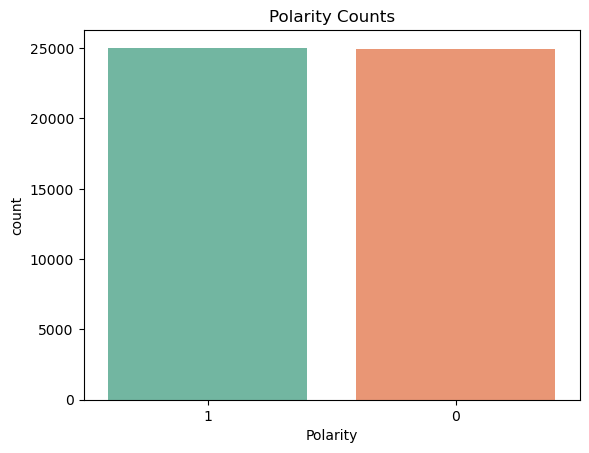

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax= sns.countplot(x='Polarity', data=df, order=df.Polarity.value_counts().index, palette='Set2')
plt.title('Polarity Counts')
plt.show()

Vemos que esta variable está equilibrada en cuestión de cantidades.

Comenzaremos analizando las columnas de texto como lo son **'Title'** y **'Reviews'**.

#### Tokenización

1. **Title**

In [ ]:
texto_1 = df.loc[0,'Title']

In [ ]:
texto_1

'Stuning even for the non-gamer'

In [ ]:
nlp(texto_1)

Stuning even for the non-gamer

In [ ]:
len(df.Title)

50001

In [ ]:
#Veamos de crear una función donde tokenicemos las primeros 5 filas de 'Title'
tokenized_titles = []
for i in range(0,5):
    doc = df.loc[i,'Title']
    token = nlp(doc)
    tokenized_titles.append(token.text)
print(tokenized_titles )

['Stuning even for the non-gamer', 'Excellent home help for parents', 'Stay far, far away.', "Don't Miss the BEAST!", 'Horrible']


In [ ]:
df.Title.head(5)

0     Stuning even for the non-gamer
1    Excellent home help for parents
2                Stay far, far away.
3              Don't Miss the BEAST!
4                           Horrible
Name: Title, dtype: object

In [ ]:
#Lo generalizamos:
#Creamos una lista para ir guardando los tokens
tokenized_titles = []

for i in range(0,len(df.Title)):
    doc = df.loc[i,'Title']
    token_title = nlp(doc)
    tokenized_titles.append(token_title.text)

print(tokenized_titles)

['Stuning even for the non-gamer', 'Excellent home help for parents', 'Stay far, far away.', "Don't Miss the BEAST!", 'Horrible', 'Nice story, but too predictable.', 'No replacements', 'If you love crazy camera work and empty NYC scenes, buy this', 'What Happen? a Good Disc', 'Great lego house!', "Worked okay, but didn't last", 'Great camera', 'Great decision to buy these', 'Blue book of Gun Values', 'The very best of Chris Botti', 'not recommended', 'Wow! A definite pleaser for Verve fans!', 'THE AMERICAN PRESIDENT / DAVE', 'This book showed how one woman can reclaim her life.', 'Extremely short life span', 'THIS IS THE WORST BOOK ON ENCAUSTICS I HAVE EVER SEEN.', 'Love', 'JUNK', 'excellent product', 'Rip-Off', 'Disappointing', 'COD 2 and 4 much better', 'Disappointed', 'Cute Movie', 'missing battery', 'procrastinators rewarded', 'This adapter works well for me', 'what a waste of a dvd and of time', 'Ouch what a stinker!', 'Defective Garbage', "IT'S NOT A SECRET", 'What series are you

In [ ]:
df_token_title = pd.DataFrame({'Tokenizacion_title':tokenized_titles})
df_token_title.head()

,Tokenizacion_title
0,Stuning even for the non-gamer
1,Excellent home help for parents
2,"Stay far, far away."
3,Don't Miss the BEAST!
4,Horrible


In [ ]:
df.head()

,Polarity,Title,Reviews
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,0,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,1,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,0,Horrible,These shoes are awful. They're cheaply made an...


In [ ]:
#Concatenamos a nuestro df
df_nuevo = pd.concat([df,df_token_title],axis=1)
#df.drop(['Resultado_NLP'],axis=1)
df_nuevo.head()

,Polarity,Title,Reviews,Tokenizacion_title
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,Stuning even for the non-gamer
1,1,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...,Excellent home help for parents
2,0,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ...","Stay far, far away."
3,1,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...,Don't Miss the BEAST!
4,0,Horrible,These shoes are awful. They're cheaply made an...,Horrible


2. **Reviews**

In [ ]:
#Creamos una lista para ir guardando los tokens
tokenized_reviews = []

for i in range(0,len(df.Title)):
    doc = df.loc[i,'Reviews']
    token_reviews = nlp(doc)
    tokenized_reviews.append(token_reviews.text)

print(tokenized_reviews)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
df_token_reviews = pd.DataFrame({'Tokenizacion_reviews':tokenized_reviews})
df_token_reviews.head()

,Tokenizacion_reviews
0,This sound track was beautiful! It paints the ...
1,Volume 1 of Dolch Sight Work Activities for gr...
2,"I made it through about 6, maybe 7 minutes of ..."
3,Lost Woods is a thrilling adventure that expla...
4,These shoes are awful. They're cheaply made an...


In [ ]:
#Concatenamos a nuestro df
df= pd.concat([df_nuevo,df_token_reviews],axis=1)
#df.drop(['Resultado_NLP'],axis=1)
df.head()

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...
2,0,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ...","Stay far, far away.","I made it through about 6, maybe 7 minutes of ..."
3,1,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...
4,0,Horrible,These shoes are awful. They're cheaply made an...,Horrible,These shoes are awful. They're cheaply made an...


### Text Cleaning

En esta parte realizaremos una limpieza de texto:
1. Eliminaremos caracteres especiales: signos de puntuación, números y otros elementos no deseados del texto. Ejemplos: puntos, comas, punto y coma, comillas, apóstrofes, dos puntos, paréntesis, corchetes, signo dólar, euro, etc. simbolos de 'mayor', 'igual', 'menor', etc.

Trabajaremos con las columnas Title y Reviews pero tokenizadas, es decir, que haremos el procesamiento con las columnas 'Tokenizacion_title' y 'Tokenizacion_reviews'.



In [ ]:
import re

In [ ]:
#Eliminar signos de puntuación y caracteres no alfanuméricos

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Aplicar la función a las columnas 'Título' y 'Reseña'
df['Tokenizacion_title'] = df['Tokenizacion_title'].apply(clean_text)
df['Tokenizacion_reviews'] = df['Tokenizacion_reviews'].apply(clean_text)


***Explicación*** de la función Clean_text:


Creamos una función **clean_text** que como input tenemos los textos de cada columna 'Tokenizacion_title' y 'Tokenizacion_reviews' y como output el mismo texto pero con la 'limpieza' pedida.

En la limpieza eliminamos caracteres especiales utilizando **Expresiones Regulares.**

- r'[^a-zA-Z\s]': En este caso tenemos que:
    - '^' entre corchetes '[]' actúa como negación, es decir, le estamos pidiendo que busque caracteres diferentes a lo que sigue luego de '^'.
    - a-z: son letras minúsculas desde la 'a' a la 'z'.
    - A-Z: son letras mayúsculas desde la 'A' a la 'Z'.
    - \s: son espacios  en blanco.

En general, r'[^a-zA-Z\s]', busca caracteres diferentes a: letras (minúsculas y mayúsculas) y espacios en blancos.

- r'\s+', ' ': son espacios en blancos y se sustituyen por uno solo y con el comando anterior éste se elimina.

In [ ]:
#Verificación
def contains_special_characters(column):
    patron = r'[^a-zA-Z\s]'
    return any(re.findall(patron, cell) for cell in column)
if contains_special_characters(df['Tokenizacion_title']):
    print("La columna 'Tokenizacion_title' contiene caracteres especiales.")
else:
    print("La columna 'Tokenizacion_title' no contiene caracteres especiales.")


La columna 'Tokenizacion_title' no contiene caracteres especiales.


In [ ]:
if contains_special_characters(df['Tokenizacion_reviews']):
    print("La columna 'Tokenizacion_reviews' contiene caracteres especiales.")
else:
    print("La columna 'Tokenizacion_reviews' no contiene caracteres especiales.")

La columna 'Tokenizacion_reviews' no contiene caracteres especiales.


2. Convertiremos todos los textos de las columnas 'Tokenizacion_title' y 'Tokenizacion_reviews' en letras minúsculas:

In [ ]:
df['Tokenizacion_title'] = df['Tokenizacion_title'].str.lower()
df['Tokenizacion_reviews'] = df['Tokenizacion_reviews'].str.lower()


In [ ]:
df.sample(5)

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews
38248,1,Great Product,I purchased this stroller almost three weeks a...,great product,i purchased this stroller almost three weeks a...
26131,0,Good camera- until it stops working,I really loved this camera- until the screen r...,good camera until it stops working,i really loved this camera until the screen re...
11783,1,Better throughput than a P4,This cost effective dual processor setup is ea...,better throughput than a p,this cost effective dual processor setup is ea...
37892,1,WARNING: Superficial white boys need not apply...,I bought this album mainly because -I had just...,warning superficial white boys need not apply,i bought this album mainly because i had just ...
490,1,Ten on Ten,"I strongly recommend this film and the ""Ten on...",ten on ten,i strongly recommend this film and the ten on ...


3. Eliminaremos Stopwords (palabras comunes y poco informativas).

Comenzaremos analizando qué stopwords encontramos. Para esto, debemos estudiar qué tokens (palabras) tenemos, compararlas con stopwords y así:

- Eliminarlas, ya que son stopwords.
- Reconocer las palabras con mayor frecuencia.

In [ ]:

df['Tokenizacion_title'] = df['Tokenizacion_title'].apply(lambda tokens: [word.text for word in nlp(tokens) if not word.is_stop])
df['Tokenizacion_reviews'] = df['Tokenizacion_reviews'].apply(lambda tokens: [word.text for word in nlp(tokens) if not word.is_stop])


***Explicación:***

Estamos sobreescribiendo las columnas de Tokenizacion_title y Tokenizacion_reviews aplicando una función *lambda* a las columnas correspondientes en la que como variable usaremos **tokens** y la función es, en ambos casos:
- ***[word.text for word in nlp(tokens) if not word.is_stop]***:

    Esta función lo que de vuelve son palabras en formato texto (*word.text*) y es con las que se va a rellenar y sustituir las columnas Tokenizacion_title y Tokenizacion_reviews.
    
    En esta sustitución, lo que se hace es: se queda con cada palabra (word) en **nlp(tokens)**, es decir, busca palabras en otras ya tokenizadas, y estudia si son stopwords o no. Si no lo son las mantiene y sino las elimina.  


In [ ]:
df.sample(4)

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews
39222,1,It is the Crisis of World Capitalism- Not Just...,"The book would better be titled ""The First wor...","[crisis, world, capitalism, worlds]","[book, better, titled, world, squeeze, paramet..."
5194,0,very bad game,this is a very bad game. i bought it and got b...,"[bad, game]","[bad, game, bought, got, bored, half, houri, t..."
28505,1,Another stellar workout by Jackie Warner,I received personal Training With Jackie: 30 D...,"[stellar, workout, jackie, warner]","[received, personal, training, jackie, day, fa..."
9300,0,DO NOT BUY!!!!,"Although I like the Kindle2, I highly disappro...",[buy],"[like, kindle, highly, disapprove, way, amazon..."


Veamos las stopwords eliminadas de una fila, por ejemplo de la 35331:

In [ ]:
#Texto de la fila
df.loc[35331,'Title']

'A POOR WRITING FROM A GREAT AUTHOR'

In [ ]:
#Tokenizamos
a= nlp(df.loc[35331,'Title'])
a

A POOR WRITING FROM A GREAT AUTHOR

In [ ]:
#Palabras tokenizadas
df.loc[35331,'Tokenizacion_title']


['poor', 'writing', 'great', 'author']

In [ ]:
#Palabras del texto de la fila
tokens=[]
for token in a:
    tokens.append(token)

print(tokens) #Para separar los tokens


[A, POOR, WRITING, FROM, A, GREAT, AUTHOR]


Así vemos que las palabras que se eliminaron fueron: 'a' y 'from'.

4. Realizaremos Lematización: reduciremos las palabras a sus formas base, lo que puede ayudar a consolidar las palabras con significados similares. Además, nos ayudará a: mejorar la presición (muchas palabras similares se tratarán como iguales); se agrupan palabras en lemas comunes (reduce la cantidad de tokens); facilita la recuperación de información; se pueden hacer análisis de sentimientos (por ej), etc.



In [ ]:
#Lematización de title:
df['lemmas_title'] = df['Tokenizacion_title'].apply(lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))])

Analicemos algunas filas para poder observar la lematización de title:

In [ ]:
filas_seleccionadas = [5778,25545,26324,37074]
filas = df.iloc[filas_seleccionadas]
nuevo_df = pd.DataFrame(filas)
columnas=['Tokenizacion_title','lemmas_title']
nuevo_df[columnas]


,Tokenizacion_title,lemmas_title
5778,[best],[good]
25545,"[dog, nt, like, bone]","[dog, not, like, bone]"
26324,[thought],[think]
37074,"[missing, pages]","[miss, page]"


Vemos que al lematizar se modificó:
- 'Best' por 'Good';
- 'nt' por 'not';
- 'thought' por 'think';
- 'missing' por 'miss';
- 'pages' por 'page'

In [ ]:
#Lematización de reviews:
df['lemmas_reviews'] = df['Tokenizacion_reviews'].apply(lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))])

In [ ]:
df.sample(3)

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews,lemmas_title,lemmas_reviews
49803,1,"Very good, but editor's judgment biased?",I found this collection to be quite through an...,"[good, editors, judgment, biased]","[found, collection, wideranging, overall, good...","[good, editor, judgment, bias]","[find, collection, wideranging, overall, good,..."
26521,1,really happy with it,It works really well. If you use the demineral...,[happy],"[works, use, demineralization, cartridge, nt, ...",[happy],"[work, use, demineralization, cartridge, nt, w..."
7648,1,LISA REVIEW,Lisa Kelly is one of the best Celtic artists i...,"[lisa, review]","[lisa, kelly, best, celtic, artists, world, cd...","[lisa, review]","[lisa, kelly, good, celtic, artist, world, cd,..."


### Keywords y tópicos:

Realizaremos un análisis de aquellas palabras más frecuentes.

In [ ]:
from collections import Counter

# Iniciamos un contador
word_counter = Counter()

# Contamos la frecuencia de las palabras en 'lemmas_title'
for lemmas_list in df['lemmas_title']:
    word_counter.update(lemmas_list)
word_counter

Counter({'stun': 2,
         'nongamer': 2,
         'excellent': 740,
         'home': 86,
         'help': 101,
         'parent': 40,
         'stay': 90,
         'far': 139,
         'away': 109,
         'not': 2012,
         'miss': 177,
         'beast': 7,
         'horrible': 315,
         'nice': 474,
         'story': 406,
         'predictable': 31,
         'replacement': 65,
         'love': 1113,
         'crazy': 16,
         'camera': 112,
         'work': 1280,
         'nyc': 5,
         'scene': 28,
         'buy': 987,
         'happen': 83,
         'good': 3835,
         'disc': 46,
         'great': 3793,
         'lego': 5,
         'house': 45,
         'okay': 79,
         'decision': 8,
         'blue': 72,
         'book': 2565,
         'gun': 33,
         'value': 160,
         'chris': 8,
         'botti': 1,
         'recommend': 103,
         'wow': 143,
         'definite': 9,
         'pleaser': 3,
         'verve': 3,
         'fan': 246,
         

In [ ]:
#Palabras con mayor frecuencia, las primeras 20
word_frec = word_counter.most_common(20)

In [ ]:
word_frec

[('good', 3835),
 ('great', 3793),
 ('book', 2565),
 ('not', 2012),
 ('work', 1280),
 ('bad', 1198),
 ('love', 1113),
 ('buy', 987),
 ('read', 912),
 ('movie', 896),
 ('product', 874),
 ('well', 794),
 ('money', 767),
 ('excellent', 740),
 ('like', 642),
 ('time', 636),
 ('waste', 629),
 ('quality', 587),
 ('poor', 562),
 ('nice', 474)]

In [ ]:
#Transformamos la lista a un data frame
word_frec_title = pd.DataFrame(word_frec,columns=['Word','Frec'])
word_frec_title

,Word,Frec
0,good,3835
1,great,3793
2,book,2565
3,not,2012
4,work,1280
5,bad,1198
6,love,1113
7,buy,987
8,read,912
9,movie,896


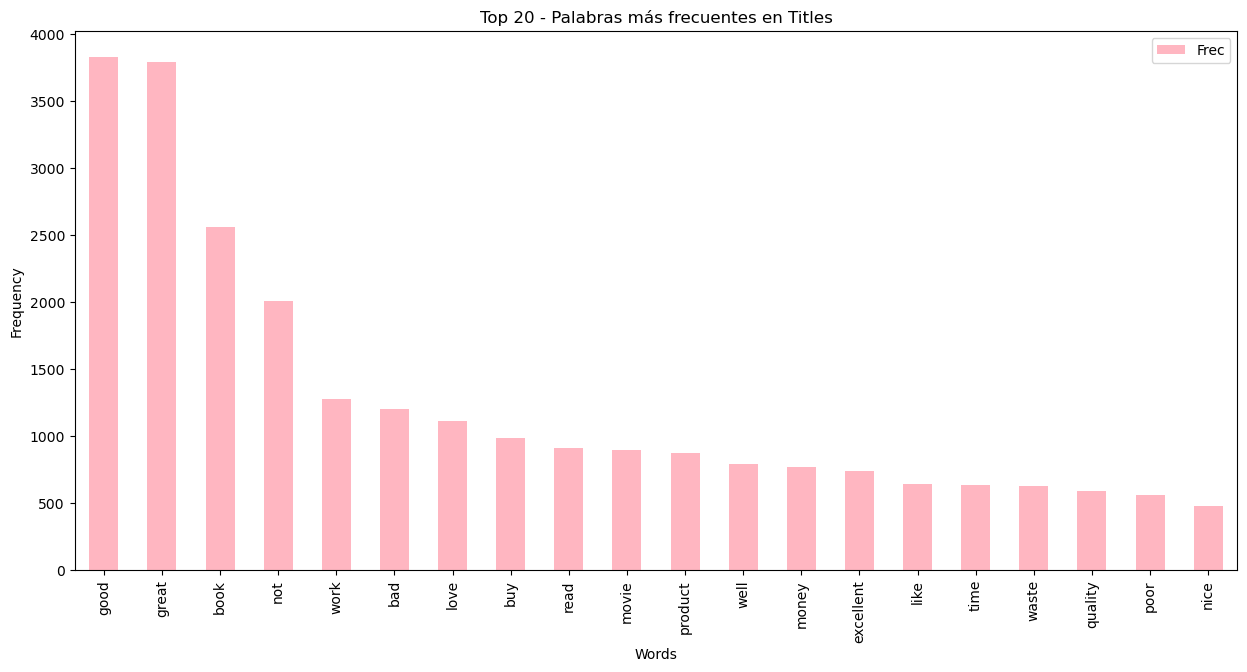

In [ ]:
#Graficamos:
word_frec_title.plot(x="Word", y="Frec", kind='bar',  figsize=(15,7), color = 'lightpink')
plt.title("Top 20 - Palabras más frecuentes en Titles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from collections import Counter

# Iniciamos un contador
word_counter_re = Counter()

# Contamos la frecuencia de las palabras en 'lemmas_reviews'
for lemmas_list in df['lemmas_reviews']:
    word_counter_re.update(lemmas_list)
word_counter_re

Counter({'sound': 3680,
         'track': 1629,
         'beautiful': 943,
         'paint': 348,
         'senery': 1,
         'mind': 996,
         'recomend': 207,
         'people': 3981,
         'hate': 833,
         'vid': 9,
         'game': 3609,
         'music': 4056,
         'play': 3911,
         'chrono': 1,
         'cross': 189,
         'good': 15167,
         'back': 92,
         'away': 1812,
         'crude': 35,
         'keyboarding': 1,
         'take': 3315,
         'fresher': 4,
         'step': 569,
         'grate': 51,
         'guitar': 585,
         'soulful': 59,
         'orchestra': 105,
         'impress': 150,
         'care': 1028,
         'listen': 2178,
         'volume': 573,
         'dolch': 3,
         'sight': 97,
         'work': 9351,
         'activity': 141,
         'grade': 217,
         'k': 86,
         'cover': 1946,
         'basic': 665,
         'word': 1563,
         'additional': 169,
         'commomon': 1,
         'noun': 

In [ ]:
#Palabras con mayor frecuencia, las primeras 20
word_frec_re = word_counter_re.most_common(20)
word_frec_re

[('book', 28389),
 ('not', 22369),
 ('good', 15167),
 ('like', 14985),
 ('buy', 11579),
 ('great', 11526),
 ('read', 11039),
 ('time', 10197),
 ('work', 9351),
 ('movie', 8642),
 ('love', 8109),
 ('think', 7450),
 ('find', 7398),
 ('look', 6595),
 ('get', 6154),
 ('want', 6035),
 ('year', 5924),
 ('use', 5906),
 ('product', 5897),
 ('well', 5829)]

In [ ]:
#Transformamos la lista a un data frame
word_frec_review = pd.DataFrame(word_frec_re,columns=['Word','Frec'])
word_frec_review

,Word,Frec
0,book,28389
1,not,22369
2,good,15167
3,like,14985
4,buy,11579
5,great,11526
6,read,11039
7,time,10197
8,work,9351
9,movie,8642


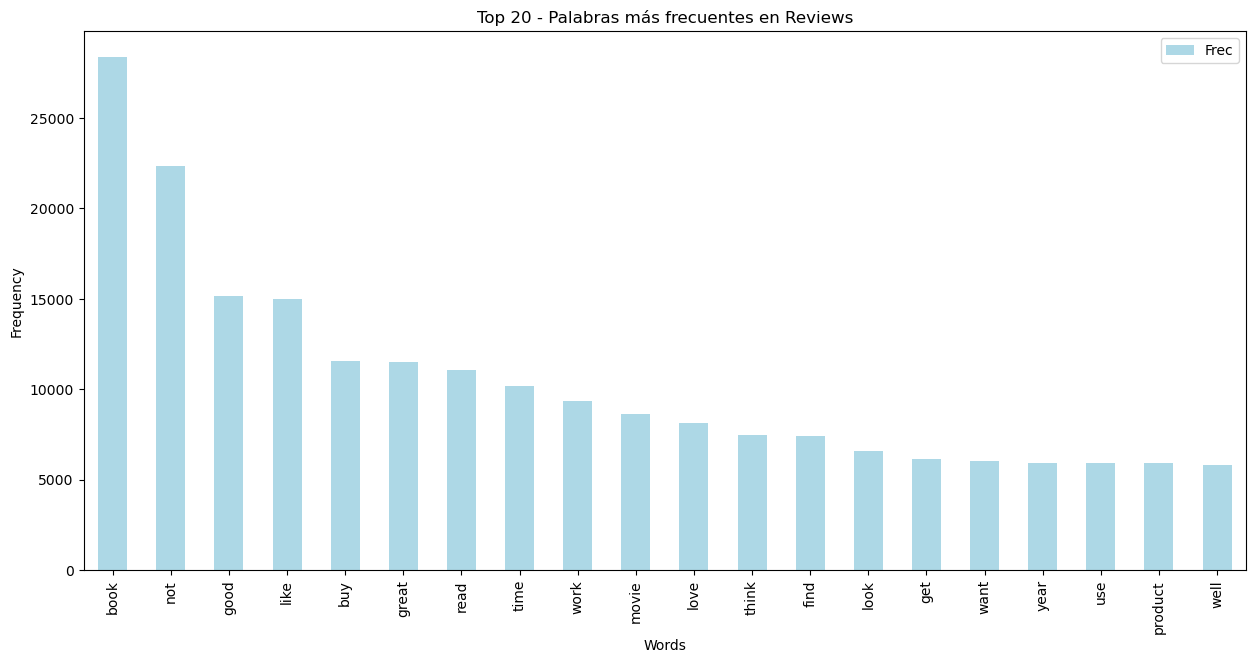

In [ ]:
#Graficamos:
word_frec_review.plot(x="Word", y="Frec", kind='bar',  figsize=(15,7), color = 'lightblue')
plt.title("Top 20 - Palabras más frecuentes en Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
!pip install wordcloud


  Using cached wordcloud-1.9.2.tar.gz (222 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp310-cp310-macosx_11_0_arm64.whl size=152701 sha256=58f155ee1323639d06731f546bcf81ab51599217a097e76669723be112d6f1d2
  Stored in directory: /Users/solpalahi/Library/Caches/pip/wheels/90/19/0b/f5cad0167bc462f4f87cbd86590c27afbe599d5a37011bcf78
Successfully built wordcloud


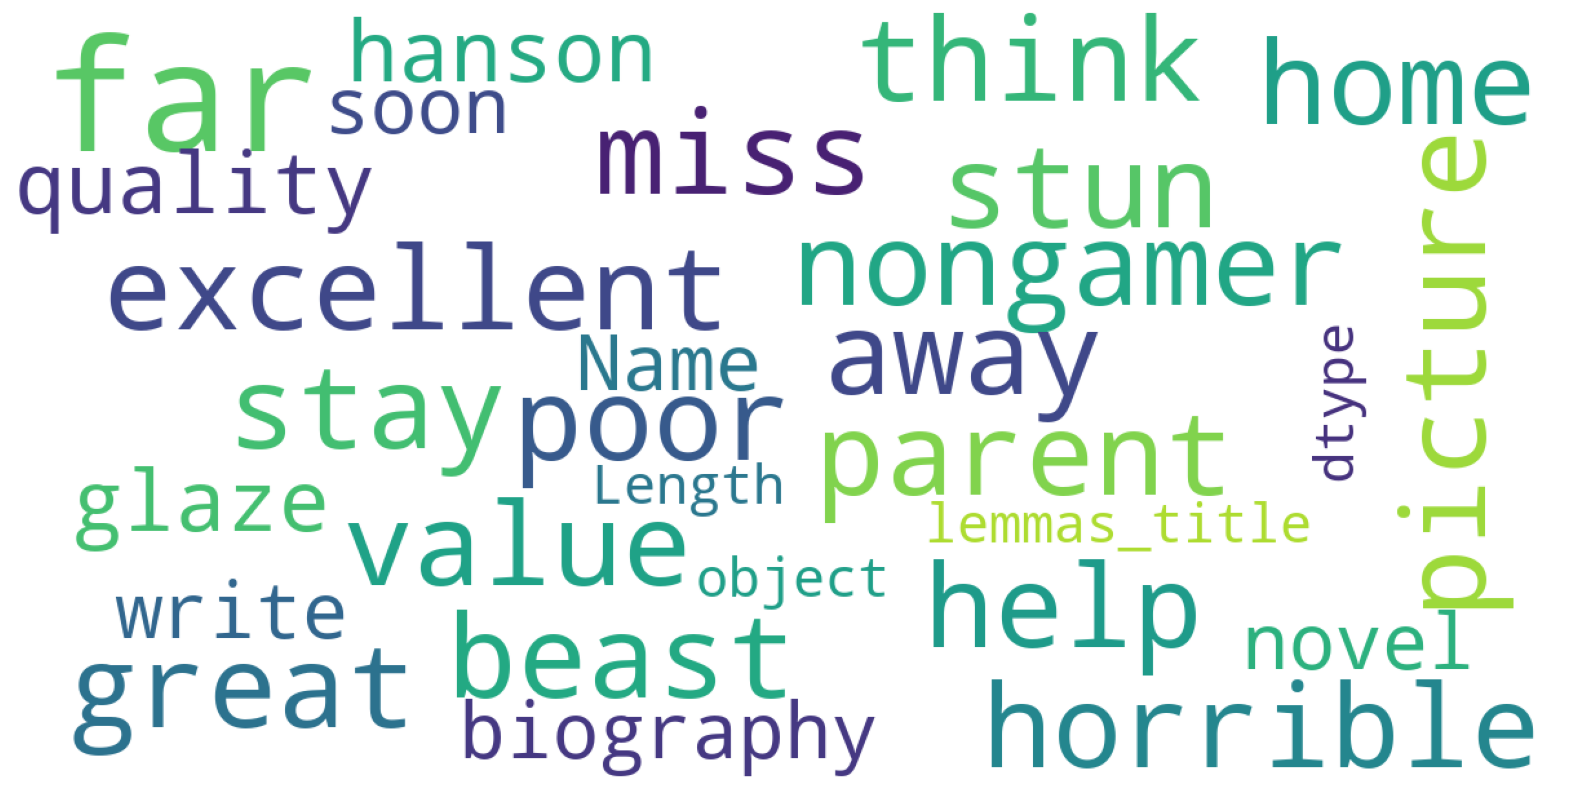

In [ ]:
from wordcloud import WordCloud
#  WordCloud chart para TITLE

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 350,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["lemmas_title"])

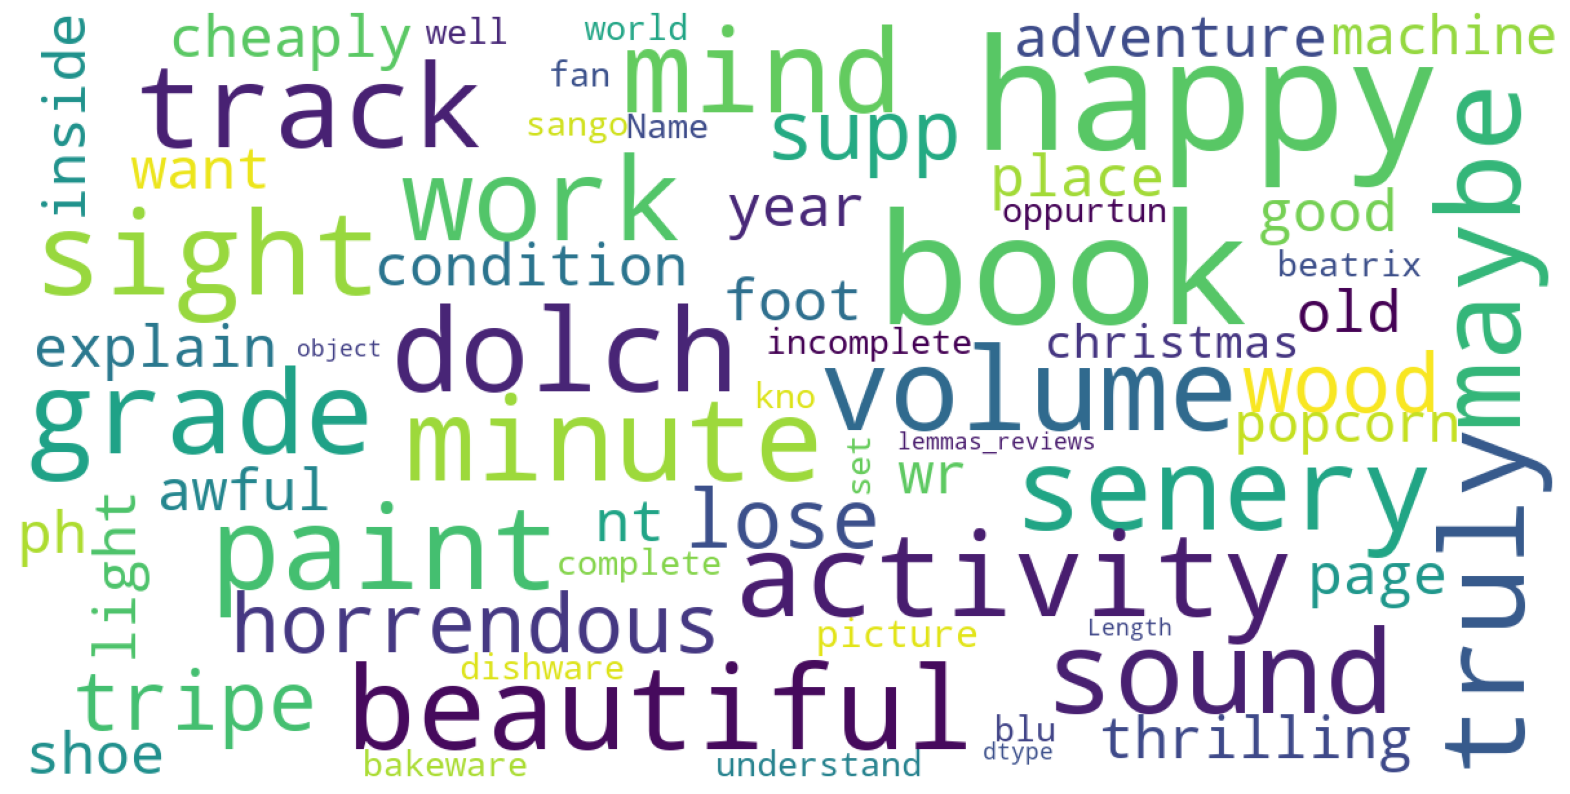

In [ ]:
from wordcloud import WordCloud
#  WordCloud chart para REVIEWS

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 350,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["lemmas_reviews"])

Con el WordCloud y el análisis de frecuencia de las palabras en las reseñas encontramos, en general, la presencia de:
- **Objetos:** como cuadernos, pochoclos, máquinas, utensillos para hornear, zapatos, vajillas, etc.
- **Sentimientos y expresiones:** como 'horrible', 'hermoso', 'bueno', 'viejo', 'barato', 'fan', 'horrendo', etc.


#### POS
Part of speech

In [ ]:
#POS en Title
def analyze_pos(tokens):
    doc = nlp(" ".join(tokens))
    pos_tags = [token.pos_ for token in doc]
    return pos_tags
df['pos_title'] = df['lemmas_title'].apply(analyze_pos)

In [ ]:
df[['lemmas_title', 'pos_title']]

,lemmas_title,pos_title
0,"[stun, nongamer]","[PROPN, NOUN]"
1,"[excellent, home, help, parent]","[ADJ, NOUN, NOUN, NOUN]"
2,"[stay, far, far, away]","[VERB, ADV, ADV, ADV]"
3,"[not, miss, beast]","[PART, VERB, NOUN]"
4,[horrible],[ADJ]
...,...,...
49996,"[great, value]","[ADJ, NOUN]"
49997,[think],[VERB]
49998,[picture],[NOUN]
49999,"[poor, quality, glaze]","[ADJ, NOUN, NOUN]"


In [ ]:
#Frecuencias de categorias gramaticales
word_counter = Counter()

# Contamos la frecuencia de las palabras en 'lemmas_title'
for lemmas_list in df['pos_title']:
    word_counter.update(lemmas_list)
word_counter


Counter({'PROPN': 17386,
         'NOUN': 54952,
         'ADJ': 31717,
         'VERB': 15967,
         'ADV': 4557,
         'PART': 2193,
         'INTJ': 1586,
         'ADP': 757,
         'X': 189,
         'NUM': 162,
         'SPACE': 310,
         'CCONJ': 53,
         'AUX': 553,
         'PRON': 150,
         'SCONJ': 26,
         'PUNCT': 51,
         'DET': 23,
         'SYM': 10})

In [ ]:
#POS en Reviews
def analyze_pos(tokens):
    doc = nlp(" ".join(tokens))
    pos_tags = [token.pos_ for token in doc]
    return pos_tags
df['pos_reviews'] = df['lemmas_reviews'].apply(analyze_pos)

In [ ]:
df.head()

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews,lemmas_title,lemmas_reviews,pos_title,pos_reviews
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,"[stuning, nongamer]","[sound, track, beautiful, paints, senery, mind...","[stun, nongamer]","[sound, track, beautiful, paint, senery, mind,...","[PROPN, NOUN]","[ADJ, NOUN, ADJ, NOUN, NOUN, NOUN, NOUN, NOUN,..."
1,1,Excellent home help for parents,Volume 1 of Dolch Sight Work Activities for gr...,"[excellent, home, help, parents]","[volume, dolch, sight, work, activities, grade...","[excellent, home, help, parent]","[volume, dolch, sight, work, activity, grade, ...","[ADJ, NOUN, NOUN, NOUN]","[NOUN, PROPN, NOUN, NOUN, NOUN, NOUN, NOUN, NO..."
2,0,"Stay far, far away.","I made it through about 6, maybe 7 minutes of ...","[stay, far, far, away]","[maybe, minutes, truly, horrendous, tripe, sup...","[stay, far, far, away]","[maybe, minute, truly, horrendous, tripe, supp...","[VERB, ADV, ADV, ADV]","[ADV, VERB, ADV, ADJ, NOUN, VERB, ADJ, NOUN, P..."
3,1,Don't Miss the BEAST!,Lost Woods is a thrilling adventure that expla...,"[nt, miss, beast]","[lost, woods, thrilling, adventure, explains, ...","[not, miss, beast]","[lose, wood, thrilling, adventure, explain, ph...","[PART, VERB, NOUN]","[VERB, NOUN, NOUN, NOUN, VERB, NOUN, NOUN, NOU..."
4,0,Horrible,These shoes are awful. They're cheaply made an...,[horrible],"[shoes, awful, cheaply, nt, foot, inside, plac...",[horrible],"[shoe, awful, cheaply, nt, foot, inside, place...",[ADJ],"[PROPN, PROPN, ADV, INTJ, VERB, ADP, NOUN, ADJ..."


In [ ]:
#Frecuencias de categorias gramaticales
word_counter_re = Counter()

# Contamos la frecuencia de las palabras en 'lemmas_title'
for lemmas_list in df['pos_reviews']:
    word_counter_re.update(lemmas_list)
word_counter_re

Counter({'ADJ': 268310,
         'NOUN': 728836,
         'VERB': 252262,
         'PROPN': 222472,
         'ADV': 73246,
         'PART': 25784,
         'INTJ': 10401,
         'ADP': 16351,
         'CCONJ': 946,
         'SCONJ': 2030,
         'AUX': 15066,
         'PRON': 3370,
         'NUM': 2338,
         'SYM': 175,
         'DET': 2166,
         'X': 3382,
         'SPACE': 166,
         'PUNCT': 196})

### Text blob:
Realizaremos un análisis de sentimiento a partir de las reseñas.

In [ ]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 4.7 MB/s eta 0:00:00a 0:00:01


In [ ]:
from textblob import TextBlob
#Creamos una función que transforme listas en cadenas de textos.

def list_to_string(tokens):
    return " ".join(tokens)

# Analizamos el sentimiento
df['sentiment_title'] =df['lemmas_title'].apply(list_to_string).apply(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
df.sample(3)

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews,lemmas_title,lemmas_reviews,pos_title,pos_reviews,sentiment_title
47172,1,Excellent reference guide for the beginner!,Great tool for brief financial definitions. Re...,"[excellent, reference, guide, beginner]","[great, tool, brief, financial, definitions, r...","[excellent, reference, guide, beginner]","[great, tool, brief, financial, definition, re...","[ADJ, NOUN, NOUN, NOUN]","[ADJ, NOUN, ADJ, ADJ, NOUN, VERB, ADJ, NOUN, N...",1.0
37968,0,Thai Elephant Orchestra,"Great background ""music"". The songs they play ...","[thai, elephant, orchestra]","[great, background, music, songs, play, remind...","[thai, elephant, orchestra]","[great, background, music, song, play, remind,...","[PROPN, PROPN, PROPN]","[ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, ADJ,...",0.0
41703,1,What makes Bob holler?,I must own about 30 Bob Wills cd's and this ha...,"[makes, bob, holler]","[bob, wills, cds, obsolete, bob, wills, fan, n...","[make, bob, holler]","[bob, will, cds, obsolete, bob, will, fan, nee...","[VERB, ADJ, NOUN]","[PROPN, AUX, PROPN, PROPN, PROPN, AUX, PROPN, ...",0.0


In [ ]:
df[['Polarity','lemmas_title','sentiment_title']]

,Polarity,lemmas_title,sentiment_title
0,1,"[stun, nongamer]",0.0
1,1,"[excellent, home, help, parent]",1.0
2,0,"[stay, far, far, away]",0.1
3,1,"[not, miss, beast]",0.0
4,0,[horrible],-1.0
...,...,...,...
49996,1,"[great, value]",0.8
49997,1,[think],0.0
49998,0,[picture],0.0
49999,0,"[poor, quality, glaze]",-0.4


In [ ]:
#Reviews
from textblob import TextBlob
#Creamos una función que transforme listas en cadenas de textos.

def list_to_string(tokens):
    return " ".join(tokens)

# Analizamos el sentimiento
df['sentiment_reviews'] =df['lemmas_reviews'].apply(list_to_string).apply(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
df.sample(3)

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews,lemmas_title,lemmas_reviews,pos_title,pos_reviews,sentiment_title,sentiment_reviews
45488,0,cable does not match generator,This item was bundled by Amazon with my 4400E ...,"[cable, match, generator]","[item, bundled, amazon, e, generator, generato...","[cable, match, generator]","[item, bundle, amazon, e, generator, generator...","[NOUN, NOUN, NOUN]","[NOUN, PROPN, PROPN, PROPN, PROPN, NOUN, VERB,...",0.0,0.800000
45700,0,REALLY BAD...,it's completelly embarassing the posture of th...,[bad],"[completelly, embarassing, posture, guys, simp...",[bad],"[completelly, embarasse, posture, guy, simple,...",[ADJ],"[ADV, ADJ, NOUN, NOUN, ADJ, ADJ, NOUN, ADJ, NO...",-0.7,-0.058333
1247,0,Don't Waste Your Time!,One of the five worst movies I've ever seen. M...,"[nt, waste, time]","[worst, movies, ve, seen, scenes, enhance, plo...","[not, waste, time]","[bad, movie, ve, see, scene, enhance, plot, nt...","[PART, VERB, NOUN]","[ADJ, NOUN, AUX, VERB, NOUN, VERB, PROPN, PROP...",0.1,-0.258160


In [ ]:
df[['Polarity','lemmas_reviews','sentiment_title','sentiment_reviews']]

,Polarity,lemmas_reviews,sentiment_title,sentiment_reviews
0,1,"[sound, track, beautiful, paint, senery, mind,...",0.0,-0.075000
1,1,"[volume, dolch, sight, work, activity, grade, ...",1.0,0.291667
2,0,"[maybe, minute, truly, horrendous, tripe, supp...",0.1,-0.085714
3,1,"[lose, wood, thrilling, adventure, explain, ph...",0.0,0.314583
4,0,"[shoe, awful, cheaply, nt, foot, inside, place...",-1.0,-0.283333
...,...,...,...,...
49996,1,"[happy, book, good, condition, page, light, wr...",0.8,0.625000
49997,1,"[year, old, want, popcorn, machine, christmas,...",0.0,0.120483
49998,0,"[picture, book, incomplete, well, beatrix, kno...",0.0,0.290000
49999,0,"[complete, set, dishware, bakeware, sango, blu...",-0.4,0.100000


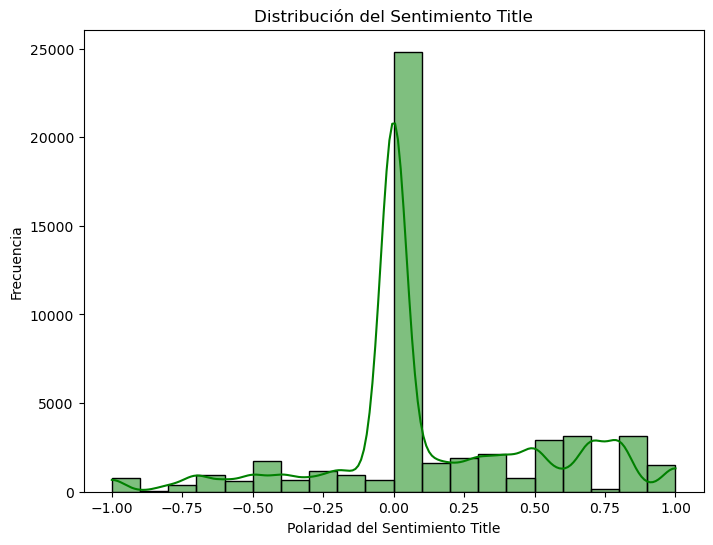

In [ ]:
#Grafico de distribución de sentimiento en Title
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_title'], bins=20, kde=True, color='green')
plt.title('Distribución del Sentimiento Title')
plt.xlabel('Polaridad del Sentimiento Title')
plt.ylabel('Frecuencia')
plt.show()

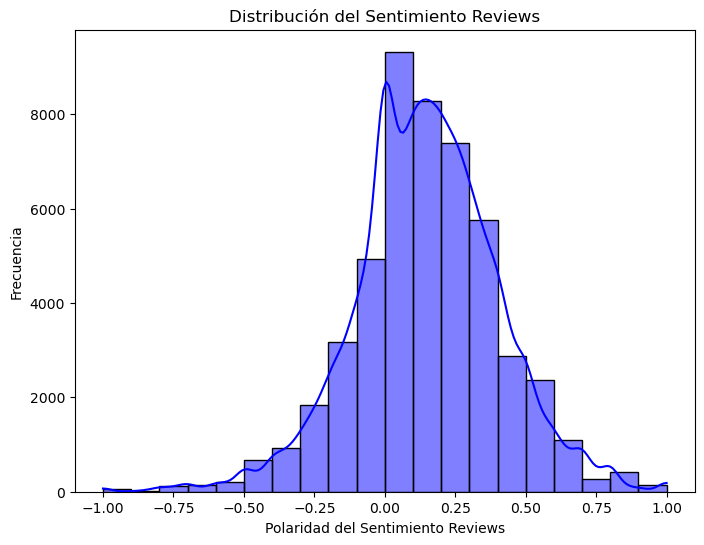

In [ ]:
#Grafico de distribución de sentimiento en Reviews
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_reviews'], bins=20, kde=True, color='blue')
plt.title('Distribución del Sentimiento Reviews')
plt.xlabel('Polaridad del Sentimiento Reviews')
plt.ylabel('Frecuencia')
plt.show()

Vemos con el gráfico una distribución aproximadamente normal centrada en cero. Es decir, que según este estudio la mayoría de las reseñas representan un resultado neutro (con respecto al sentimiento). Esto en la columna 'Polarity' no lo podíamos apreciar ya que, segun el data set original, aquellos neutros eran los que habían puntuado con un 3 y habían sido eliminados. Esto hace que sea extraño ya que no deberían haber reseñas neutras y encontramos acá que, en general, son neutras.  

In [ ]:
df[['sentiment_title','sentiment_reviews']].corr()

,sentiment_title,sentiment_reviews
sentiment_title,1.000000,0.328523
sentiment_reviews,0.328523,1.000000


Al estudiar la correlación entre la columna 'Title' y 'Reseñas' (luego de todo un preprocesamiento de los textos) vemos que tienen una correlación positiva mínima. Esto nos indica que no hay relación lineal fuerte entre las variables y por lo tanto, se concluye, que no es necesario trabajar con ambas por separado y que la de 'Reseña' aporta más información que el título.

In [ ]:
df[['Polarity','sentiment_title','sentiment_reviews']].corr()

,Polarity,sentiment_title,sentiment_reviews
Polarity,1.000000,0.442317,0.462020
sentiment_title,0.442317,1.000000,0.328523
sentiment_reviews,0.462020,0.328523,1.000000


Al estudiar la correlación ahora con la columna Polarity (original del data set) vemos que las correlaciones contra ésta son mayores. Es un buen indicio este hecho ya que 'Polarity' es un estudio previo obtenido a partir de las puntuaciones de la gente y las de 'sentiment' son analizadas a partir de las reseñas escritas. Esto habla de la relación que debe existir entre estas variables.

Ahora modificaremos los valores numéricos y estableceremos que:
- Si el valor > 0.3 se clasifica como una reseña Positiva.
- Si el valor < -0.3 se clasifica como una reseña Negativa.
- Si no se clasifica la reseña como neutra.
    

In [ ]:
#Title
def categorizar_polaridad(polaridad):
    if polaridad > 0.3:
        return "Positiva"
    elif polaridad < -0.3:
        return "Negativa"
    else:
        return "Neutra"

df['sentimiento_title']=df['sentiment_title'].apply(categorizar_polaridad)



In [ ]:
df[['Polarity','sentiment_title','sentimiento_title']]

,Polarity,sentiment_title,sentimiento_title
0,1,0.0,Neutra
1,1,1.0,Positiva
2,0,0.1,Neutra
3,1,0.0,Neutra
4,0,-1.0,Negativa
...,...,...,...
49996,1,0.8,Positiva
49997,1,0.0,Neutra
49998,0,0.0,Neutra
49999,0,-0.4,Negativa


In [ ]:
#Frecuencias
df['sentimiento_title'].value_counts()

Neutra      31272
Positiva    13805
Negativa     4924
Name: sentimiento_title, dtype: int64

In [ ]:
#Frecuencias porcentuales
df['sentimiento_title'].value_counts(normalize=True)*100

Neutra      62.542749
Positiva    27.609448
Negativa     9.847803
Name: sentimiento_title, dtype: float64

In [ ]:
#Reviews
def categorizar_polaridad(polaridad):
    if polaridad > 0.3:
        return "Positiva"
    elif polaridad < -0.3:
        return "Negativa"
    else:
        return "Neutra"

df['sentimiento_reviews']=df['sentiment_reviews'].apply(categorizar_polaridad)


In [ ]:
df[['Polarity','sentiment_title','sentimiento_title','sentiment_reviews','sentimiento_reviews']]

,Polarity,sentiment_title,sentimiento_title,sentiment_reviews,sentimiento_reviews
0,1,0.0,Neutra,-0.075000,Neutra
1,1,1.0,Positiva,0.291667,Neutra
2,0,0.1,Neutra,-0.085714,Neutra
3,1,0.0,Neutra,0.314583,Positiva
4,0,-1.0,Negativa,-0.283333,Neutra
...,...,...,...,...,...
49996,1,0.8,Positiva,0.625000,Positiva
49997,1,0.0,Neutra,0.120483,Neutra
49998,0,0.0,Neutra,0.290000,Neutra
49999,0,-0.4,Negativa,0.100000,Neutra


In [ ]:
#Frecuencias
df['sentimiento_reviews'].value_counts()

Neutra      35059
Positiva    12920
Negativa     2022
Name: sentimiento_reviews, dtype: int64

In [ ]:
#Frecuencias porcentuales
porcentajes=df['sentimiento_reviews'].value_counts(normalize=True)*100
porcentajes

Neutra      70.116598
Positiva    25.839483
Negativa     4.043919
Name: sentimiento_reviews, dtype: float64

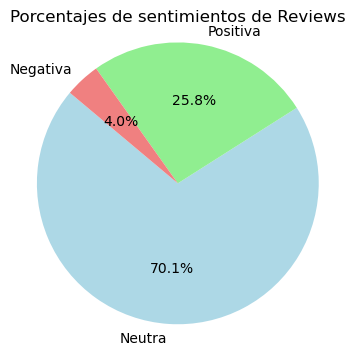

In [ ]:
etiquetas=porcentajes.index
porcentajes=porcentajes.values
colores=['lightblue','lightgreen','lightcoral']
plt.figure(figsize=(4, 4))
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=140)
plt.title('Porcentajes de sentimientos de Reviews')
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse
plt.show()


En general, y como ya habíamos visto en los gráficos, el 70% de los datos nos da que tienen un sentimiento **Neutro**.

Para terminar de analizar la información que aporta el título de la reseña y la reseña en sí, veamos cuántos datos coinciden en el análisis de sentimiento.

In [ ]:
sentimiento_gral= df[df['sentimiento_title']==df['sentimiento_reviews']]
print(f'En el análisis de sentimiento: el titulo y la reseña coinciden en {sentimiento_gral.shape[0]} casos.')
print('----')
print(f'El porcentaje de coincidencia es: {(sentimiento_gral.shape[0]/df.shape[0])*100}')
print('----')
print('Las frecuencias porcentuales de coincidencia, con respecto a todo el conjunto de datos, son:')
(sentimiento_gral['sentimiento_reviews'].value_counts()/df.shape[0])*100

En el análisis de sentimiento: el titulo y la reseña coinciden en 29443 casos.
----
El porcentaje de coincidencia es: 58.88482230355393
----
Las frecuencias porcentuales de coincidencia, con respecto a todo el conjunto de datos, son:


Neutra      46.311074
Positiva    11.393772
Negativa     1.179976
Name: sentimiento_reviews, dtype: float64

Vemos que en el 60% (aprox) lo estudiado con el titulo y con la reseña coinciden y se mantienen en el orden de frecuencia la cantidad de sentimientos: Neutros, Positivos y Negativos.

Veamos qué sucede entre Review y Polarity:

In [ ]:
mask=(df['sentimiento_reviews']=='Positiva') & (df['Polarity']==1 )
print(f'Coincidencias entre Reviews Positivas y Polaridad 1: {df[mask].shape[0]}')
mask=(df['sentimiento_reviews']=='Negativa') & (df['Polarity']==0 )
print(f'Coincidencias entre Reviews Negativas y Polaridad 0: {df[mask].shape[0]}')
mask=(df['sentimiento_reviews']=='Neutra') & (df['Polarity']==1 )
print(f'Coincidencias entre Reviews Neutra y Polaridad 1: {df[mask].shape[0]}')
mask=(df['sentimiento_reviews']=='Neutra') & (df['Polarity']==0 )
print(f'Coincidencias entre Reviews Neutra y Polaridad 0: {df[mask].shape[0]}')
mask=(df['sentimiento_reviews']=='Postiva') & (df['Polarity']==0 )
print(f'Coincidencias entre Reviews Positiva y Polaridad 0: {df[mask].shape[0]}')
mask=(df['sentimiento_reviews']=='Negativa') & (df['Polarity']==1 )
print(f'Coincidencias entre Reviews Negativa y Polaridad 1: {df[mask].shape[0]}')

Coincidencias entre Reviews Positivas y Polaridad 1: 10322
Coincidencias entre Reviews Negativas y Polaridad 0: 1881
Coincidencias entre Reviews Neutra y Polaridad 1: 14570
Coincidencias entre Reviews Neutra y Polaridad 0: 20489
Coincidencias entre Reviews Positiva y Polaridad 0: 0
Coincidencias entre Reviews Negativa y Polaridad 1: 141


Vemos que la mayoría es una reseña neutra pero de polaridad 0. Esto quiere decir que, según la reseña escrita, el sentimiento es neutro (ni positivo ni negativo) pero por un análisis de anazon según la puntuación de la persona (fue de 1 pto o 2 ptos) la reseña es negativa.
Además, vemos que hay 141 casos donde según el texto escrito nos da que la reseña es negativa pero según la puntuación es positiva. Donde vemos que se está produciendo algún porcentaje de **error**.

Veamos esto en una tabla para que sea más visible.

In [ ]:
sent = {
        'Review_POS':[0,10322],
        'Review_NEG':[1881,141],
        'Review_NEU':[20489,14570],

        }
sent_df = pd.DataFrame(sent)
sent_df = sent_df.rename(index={0: 'Polaridad_0', 1: 'Polaridad_1'})
sent_df

,Review_POS,Review_NEG,Review_NEU
Polaridad_0,0,1881,20489
Polaridad_1,10322,141,14570


### Entidades:

Identificaremos entidades de las reseñas, es decir, extraeremos partes específicas del texto que se encuentra en las Reseñas y las clasificaremos en diferentes categorías. De esta forma estaremos obteniendo información específica del texto, encontraremos relaciones, etc. Podremos, en general, entender las características específicas que los usuarios destacan o critican en sus comentarios.

In [ ]:
df['Entidades_reviews'] = df['Reviews'].apply(lambda reseña: [(entidad.text, entidad.label_) for entidad in nlp(reseña).ents])

# Imprimir el DataFrame con las entidades identificadas


In [ ]:
df[['Reviews', 'Entidades_reviews']]

,Reviews,Entidades_reviews
0,This sound track was beautiful! It paints the ...,"[(Chrono Cross, ORG)]"
1,Volume 1 of Dolch Sight Work Activities for gr...,"[(1, CARDINAL), (K-1, PRODUCT), (110, CARDINAL..."
2,"I made it through about 6, maybe 7 minutes of ...","[(about 6, CARDINAL), (7 minutes, TIME), (Andr..."
3,Lost Woods is a thrilling adventure that expla...,"[(Lost Woods, PERSON), (Bigfoot, PERSON), (198..."
4,These shoes are awful. They're cheaply made an...,[]
...,...,...
49996,I was very happy to see that the book was in v...,"[(only one, CARDINAL), (two, CARDINAL)]"
49997,My 3 year old wanted a popcorn machine for Chr...,"[(3 year old, DATE), (Christmas, DATE), (only ..."
49998,Without pictures this book is incomplete at be...,"[(Beatrix, GPE), (project gutenberg, PERSON), ..."
49999,I have almost a complete set of dishware and b...,"[(the Sango Blue, ORG), (a year ago, DATE)]"


In [ ]:
df.sample(4)

,Polarity,Title,Reviews,Tokenizacion_title,Tokenizacion_reviews,lemmas_title,lemmas_reviews,pos_title,pos_reviews,sentiment_title,sentiment_reviews,sentimiento_title,sentimiento_reviews,Entidades_reviews
45046,0,Average product,When you have to call Plantronics tech support...,"[average, product]","[plantronics, tech, support, device, simply, s...","[average, product]","[plantronic, tech, support, device, simply, st...","[ADJ, NOUN]","[ADJ, NOUN, NOUN, NOUN, ADV, VERB, NOUN, NOUN,...",-0.1500,0.152778,Neutra,Neutra,"[(1 day, DATE), (a few days, DATE), (2, CARDIN..."
49517,0,Makes you appreciate how good the original ver...,I was looking forward to hearing John Farnham'...,"[makes, appreciate, good, original, versions]","[looking, forward, hearing, john, farnhams, in...","[make, appreciate, good, original, version]","[look, forward, hear, john, farnhams, interpre...","[VERB, VERB, ADJ, ADJ, NOUN]","[VERB, ADV, VERB, PROPN, PROPN, PROPN, PROPN, ...",0.5375,0.380263,Positiva,Positiva,"[(John Farnham's, PERSON), (Classic Australian..."
28529,0,Not so good...,I have to say that this is the first book in t...,[good],"[book, series, nt, love, catty, changed, book,...",[good],"[book, series, nt, love, catty, change, book, ...",[ADJ],"[PROPN, PROPN, PROPN, VERB, ADJ, NOUN, NOUN, A...",0.7000,0.097222,Positiva,Neutra,"[(first, ORDINAL), (Catty, PERSON), (Chris SHO..."
35798,0,Not worth my time reading,OMG - why would I care about these characters?...,"[worth, time, reading]","[omg, care, characters, uninteresting, stopped...","[worth, time, read]","[omg, care, character, uninteresting, stop, bo...","[ADJ, NOUN, VERB]","[NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, VERB, VER...",0.3000,0.330000,Neutra,Positiva,"[(16%, PERCENT), (today, DATE)]"


Determinemos qué entidades se encontraron y con qué frecuencia.

In [ ]:
# Crear una lista de entidades
entidades_lista = [entidad[0] for fila in df['Entidades_reviews'] for entidad in fila]
etiquetas = [entidad[1] for fila in df['Entidades_reviews'] for entidad in fila]

# Calcular la frecuencia de las etiquetas
frecuencia_entidades = Counter(etiquetas)

# Creamos un DataFrame
df_frecuencia_enti = pd.DataFrame.from_dict(frecuencia_entidades, orient='index', columns=['Frecuencia']).reset_index()
df_frecuencia_enti = df_frecuencia_enti.rename(columns={'index': 'Entidades'})

df_frecuencia_enti=df_frecuencia_enti.sort_values(by='Frecuencia', ascending=False)
df_frecuencia_enti



,Entidades,Frecuencia
3,PERSON,36712
0,ORG,29111
1,CARDINAL,26558
5,DATE,20381
9,GPE,9703
7,ORDINAL,8743
11,NORP,6187
6,WORK_OF_ART,6044
4,TIME,3903
13,MONEY,3056


Donde:
- PERSON: Nombres o apellidos de personas.
- ORG: Organizaciones, empresas, instituciones, agencias, etc.
- CARDINAL: Números cardinales.
- DATE: Fecha y expresiones relacionadas con el tiempo.
- GPE: Paises, ciudades y estados.
- ORDINAL: Números ordinales.
- NORP: Nacionalidad, religión o afiliación política de un grupo de personas.
- WORK_OF_ART: Obras de arte (libros, películas, canciones, pinturas, etc.)
- TIME: Expresiones relacionadas con el tiempo.
- MONEY: Dinero, valores monetarios.
- PRODUCT: Etiquetar productos y bienes de consumo.
- LOC: Ubicaciones geográficas (ciudades, paises, estados, etc.)
- QUANTITY: Medidas físicas, cantidades numéricas y unidades de medida.
- FAC: Instalaciones y lugares públicos.
- EVENT: Eventos, conferencias, competiciones y actividades programadas.
- PERCENT: Porcentajes.
- LANGUAGE: Idiomas.
- LAW: Campo legal.

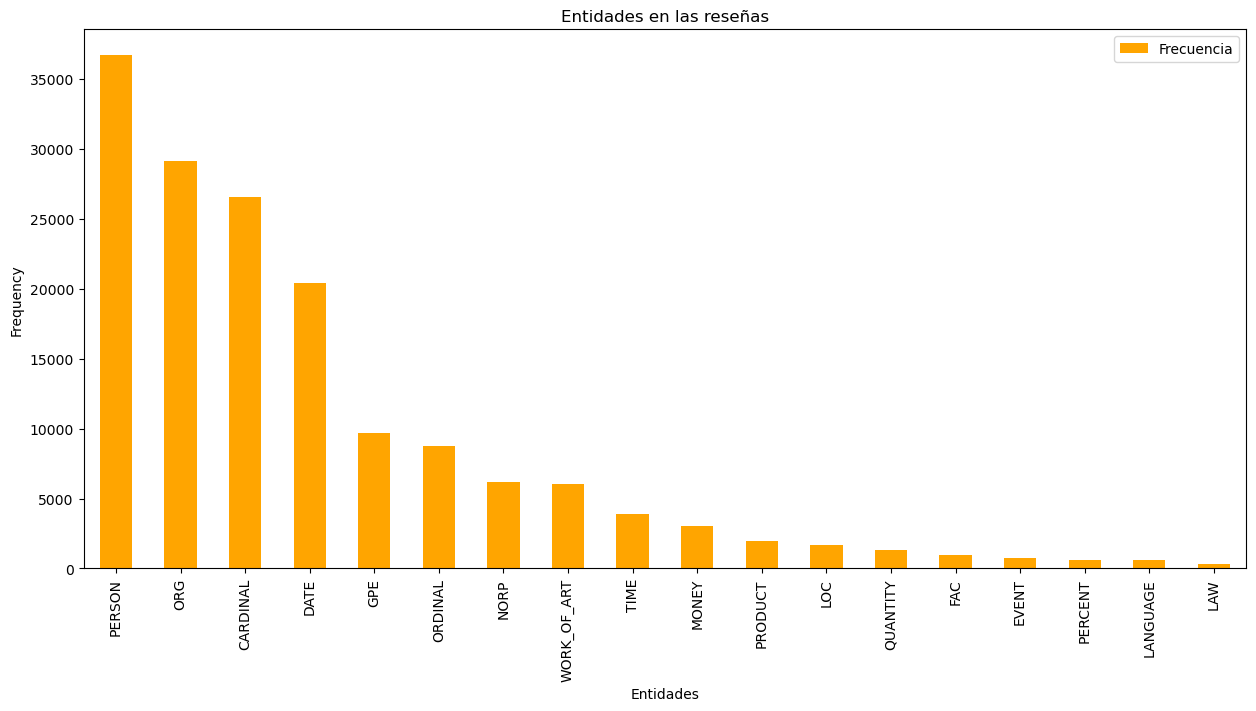

In [ ]:
#Graficamos:
df_frecuencia_enti.plot(x="Entidades", y="Frecuencia", kind='bar',  figsize=(15,7), color = 'orange')
plt.title("Entidades en las reseñas")
plt.xlabel("Entidades")
plt.ylabel("Frequency")
plt.show()

Con el gráfico y la tabla de frecuencia vemos que, en su mayoría, tenemos personas y luego organizaciones. En menor medida tenemos LAW referido a términos legales.

Estudiemos que organizaciones (ORG) se mencionan en las reseñas.

### ORG:

In [ ]:
#Creamosuna función para quedarnos con las entidades de la etiqueta ORG
def obtener_entidades_org(lista_entidades):
    entidades_org = [entidad[0] for entidad in lista_entidades if entidad[1] == 'ORG']
    return entidades_org

#Aplicamos la funcion a la entidades
org_entidades = df['Entidades_reviews'].apply(obtener_entidades_org)
print(org_entidades)

0           [Chrono Cross]
1                       []
2                       []
3                       []
4                       []
               ...        
49996                   []
49997                   []
49998    [the Kindle free]
49999     [the Sango Blue]
50000             [Hanson]
Name: Entidades_reviews, Length: 50001, dtype: object


In [ ]:
#Creamos un dataframe
org_entidades_df=pd.DataFrame(org_entidades)
org_entidades_df= org_entidades_df[org_entidades_df['Entidades_reviews'].apply(lambda x: len(x) > 0)]


org_entidades_df

,Entidades_reviews
0,[Chrono Cross]
7,"[National, EP, National]"
16,[Urban Hymns]
21,[Voltron]
30,[Microsoft]
...,...
49993,"[Titanic, Titanic, Titanic]"
49994,[Amazon]
49998,[the Kindle free]
49999,[the Sango Blue]


In [ ]:
#Calculamos frecuencias
frec_org= org_entidades_df['Entidades_reviews'].value_counts().sort_values(ascending=False)
frec_org.head(20)

[Amazon]                    844
[Amazon, Amazon]            106
[Amazon.com]                 62
[Sony]                       56
[VHS]                        48
[iPod]                       40
[REALLY]                     38
[Disney]                     34
[un]                         31
[LOVE]                       28
[amazon.com]                 26
[LOT]                        26
[HBO]                        24
[Amazon, Amazon, Amazon]     24
[Samsung]                    24
[Target]                     22
[WOW]                        22
[HUGE]                       22
[MTV]                        22
[Microsoft]                  22
Name: Entidades_reviews, dtype: int64

Observemos que en general, la organización con la que mayor frecuencia aparece es AMAZON en las reseñas.



In [ ]:
#Creamos una función para recolectar los datos donde la organización es AMAZON
def contiene_amazon(entidades):
    for entidad, etiqueta in entidades:
        if etiqueta == 'ORG' and entidad == 'Amazon':
            return True
    return False
mascara = df['Entidades_reviews'].apply(contiene_amazon)

# Filtrar las filas que contienen 'Amazon'
filas_filtradas = df[mascara]

In [ ]:
#Cantidad de filas
filas_filtradas.shape[0]

1681

Veamos las columnas: Polaridad, Entidad, y Sentimiento de las reseñas para analizar en general qué criticas sobre Amazon se encuentra.

In [ ]:
filas_filtradas[['Polarity','sentimiento_reviews','Entidades_reviews']]

,Polarity,sentimiento_reviews,Entidades_reviews
34,0,Neutra,"[(first, ORDINAL), (Amazon, ORG), (one, CARDIN..."
48,0,Neutra,"[(April of 2012, DATE), (this month, DATE), (A..."
100,0,Positiva,"[(Amazon, ORG), (satin, PERSON), (100%, PERCENT)]"
164,0,Neutra,"[(a few months, DATE), (just over a year, DATE..."
271,1,Negativa,"[(Amazon, ORG), (Flank Steak, ORG), (annual, D..."
...,...,...,...
49934,0,Neutra,"[(Amazon, ORG), (yesterday, DATE)]"
49941,0,Neutra,"[(John Fogerty, PERSON), (Premonition Is The B..."
49971,1,Neutra,"[(the years, DATE), (the Cho-Pat, PERSON), (Am..."
49976,1,Neutra,"[(8-year old, DATE), (yesterday, DATE), (Klutz..."


In [ ]:
filas_filtradas['sentimiento_reviews'].value_counts().sort_values(ascending=False)

Neutra      1254
Positiva     370
Negativa      57
Name: sentimiento_reviews, dtype: int64

In [ ]:
filas_filtradas['Polarity'].value_counts()

0    1093
1     588
Name: Polarity, dtype: int64

Vemos que, según nuestro análisis de sentimiento, en la gran mayoría tenemos que la reseña es Neutra, luego positiva y en menor medida negativa. Pero si vemos la columna precargada en el dataset, la mayoría es '0' lo que significa que la votación de las personas había sido entre 1 y 2 y significaba una crítica negativa.

Hagamos un analisis similar pero con los **PRODUCTOS**.

###  Products:

In [ ]:
#Creamos una función:
def obtener_entidades_product(lista_entidades):
    entidades_product = [entidad[0] for entidad in lista_entidades if entidad[1] == 'PRODUCT']
    return entidades_product

# Aplicar la función a la columna "entidades" y crear una nueva columna "org_entidades"
product_entidades = df['Entidades_reviews'].apply(obtener_entidades_product)

# Explorar las entidades de la categoría "ORG"
print(product_entidades)

0           []
1        [K-1]
2           []
3           []
4           []
         ...  
49996       []
49997       []
49998       []
49999       []
50000       []
Name: Entidades_reviews, Length: 50001, dtype: object


In [ ]:
product_entidades_df=pd.DataFrame(product_entidades)
product_entidades_df= product_entidades_df[product_entidades_df['Entidades_reviews'].apply(lambda x: len(x) > 0)]
product_entidades_df=product_entidades_df.reset_index()
product_entidades_df.drop(['index'],axis=1)
product_entidades_df

,index,Entidades_reviews
0,1,[K-1]
1,12,[120V]
2,19,[Magic Chef]
3,31,[KB935448]
4,40,[Delimma]
...,...,...
1683,49873,[Simenon]
1684,49948,[Verbatims]
1685,49969,"[Neri per Caso's, Improvvisando, Neri per Caso]"
1686,49979,[the Lazarus Pits]


In [ ]:
frec_product= product_entidades_df['Entidades_reviews'].value_counts().sort_values(ascending=False)
frec_product.head(20)

[Classic]           30
[Cuisinart]         17
[F]                 17
[Xbox]              13
[frisbee]            9
[iPods]              8
[Notes]              7
[Limp Bizkit]        7
[Jessica]            7
[Atlantis]           6
[Clay]               6
[Stephanie Plum]     6
[Alpha]              6
[Teflon]             6
[Baby One]           5
[Stranger]           5
[Excel]              5
[E-Bay]              5
[Voyager]            5
[Scarpetta]          5
Name: Entidades_reviews, dtype: int64

In [ ]:
frec_product_df=pd.DataFrame(frec_product)
frec_product_df = frec_product_df.reset_index()
frec_product_df

,index,Entidades_reviews
0,[Classic],30
1,[Cuisinart],17
2,[F],17
3,[Xbox],13
4,[frisbee],9
...,...,...
1333,[Hotel Butlers],1
1334,[Shopgirl],1
1335,[Bathtub Gin],1
1336,[Tetris],1


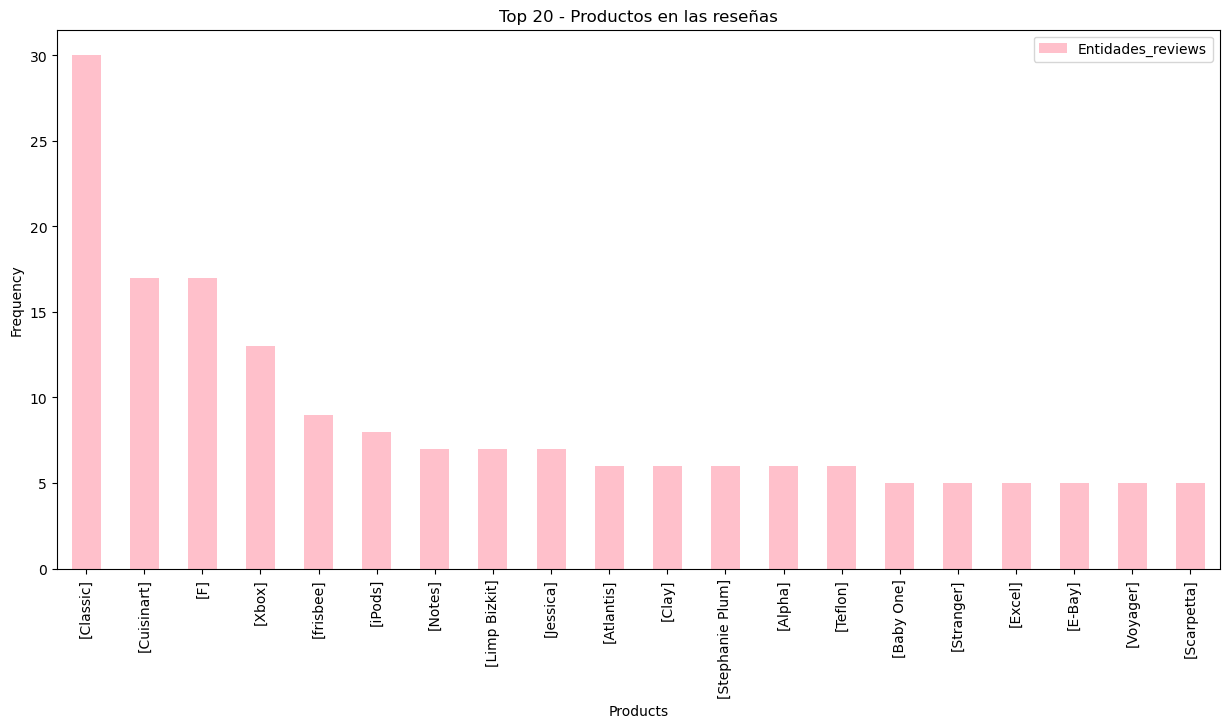

In [ ]:
#Graficamos:
frec_product_df.head(20).plot(x="index", y="Entidades_reviews", kind='bar',  figsize=(15,7), color = 'pink')
plt.title("Top 20 - Productos en las reseñas")
plt.xlabel("Products")
plt.ylabel("Frequency")
plt.show()

Los productos que aparecen con mayor frecuencia en las reseñas son: Classic (habría que investigar más para entender a qué se refiere), Cuisinart (cocina), Xbox, Frisbee, iPods, etc.
Veamos en general cómo fueron estas reseñas.

#### Xbox

In [ ]:
#Visualizaremos las reseñas con Xbox
def contiene_Xbox(entidades):
    for entidad, etiqueta in entidades:
        if etiqueta == 'PRODUCT' and entidad == 'Xbox':
            return True
    return False
mascara = df['Entidades_reviews'].apply(contiene_Xbox)

# Filtrar las filas que contienen 'Xbox'
filas_filtradas2 = df[mascara]

In [ ]:
filas_filtradas2[['Polarity','sentimiento_reviews','Entidades_reviews']]


,Polarity,sentimiento_reviews,Entidades_reviews
6631,1,Neutra,"[(four days ago, DATE), (Xbox, PRODUCT), (Godf..."
10921,0,Neutra,"[(Sega, PERSON), (Madden, PERSON), (2k, CARDIN..."
11867,0,Positiva,"[(two, CARDINAL), (LoL, WORK_OF_ART), (Xbox, N..."
13542,0,Neutra,"[(every day, DATE), (Xbox, PRODUCT), (about a ..."
15679,1,Neutra,"[(Xbox, PRODUCT), (CTF, ORG), (Xbox, PRODUCT),..."
24858,0,Positiva,"[(Cat, LOC), (Xbox, PRODUCT), (Lemon, GPE)]"
26546,0,Negativa,"[(one, CARDINAL), (a Thanksgiving Holiday, EVE..."
31981,1,Neutra,"[(Xbox, ORG), (seconds, TIME), (every day, DAT..."
34570,1,Neutra,"[(Xbox, NORP), (Xbox, PRODUCT), (The 12 months..."
42508,0,Neutra,"[(Xbox, PRODUCT), (6th(last)most, CARDINAL), (..."


In [ ]:
filas_filtradas2.sentimiento_reviews.value_counts()

Neutra      12
Positiva     2
Negativa     1
Name: sentimiento_reviews, dtype: int64

In [ ]:
filas_filtradas2.Polarity.value_counts()

0    8
1    7
Name: Polarity, dtype: int64

Con Xbox, vemos que en general, segun el analisis de sentimiento la reseñas fueron neutras y con el analisis anterior del dataset está bastante equilibrado entre reseñas negativas y positivas.

Veamos qué es:

#### Classic:

In [ ]:
#Visualizaremos las reseñas con Classic
def contiene_Classic(entidades):
    for entidad, etiqueta in entidades:
        if etiqueta == 'PRODUCT' and entidad == 'Classic':
            return True
    return False
mascara = df['Entidades_reviews'].apply(contiene_Classic)

# Filtrar las filas que contienen 'Classic'
filas_filtradas3 = df[mascara]

In [ ]:
filas_filtradas3[['Polarity','lemmas_reviews','sentimiento_reviews','Entidades_reviews']]

,Polarity,lemmas_reviews,sentimiento_reviews,Entidades_reviews
1623,1,"[possible, album, love, rock, not, explain, gu...",Neutra,"[(14, DATE), (36, DATE), (Classic, PRODUCT), (..."
2215,1,"[classic, golf, instruction, revere, master, r...",Neutra,"[(Classic, PRODUCT)]"
2296,1,"[classic, movie, love, little, girl, love, mov...",Neutra,"[(Classic, PRODUCT)]"
4336,1,"[movie, make, classic, story, line, way, film,...",Neutra,"[(Classic, PRODUCT), (BANANAS, ORG)]"
5113,1,"[brilliant, ve, wait, long, dvd, copy, tape, f...",Positiva,"[(two, CARDINAL), (ten years old, DATE), (Clas..."
5807,1,"[love, disfunctional, family, classic, movie, ...",Positiva,"[(Classic, PRODUCT)]"
8188,1,"[work, christian, bookstore, plus, year, good,...",Neutra,"[(Christian Bookstores, ORG), (30 plus years, ..."
8853,1,"[nice, selfproduced, cd, great, great, singer,...",Positiva,"[(Track 12, WORK_OF_ART), (Tony Joe White's, P..."
11241,1,"[terrific, collection, purchase, consider, cat...",Neutra,"[(Cat People and The Body Snatcher, ORG), (two..."
11352,1,"[classic, good, look, feel, sturdy, handle, so...",Neutra,"[(Classic, PRODUCT)]"


Si nos centramos en las 'Reviews', vemos que se escriben diferentes productos como: películas, cuadernos, cds, dvds, musica, etc. Estan bastante relacionados.

Veamos el análisis de sentimiento:

In [ ]:
filas_filtradas3.sentimiento_reviews.value_counts()

Neutra      23
Positiva     7
Negativa     1
Name: sentimiento_reviews, dtype: int64

In [ ]:
filas_filtradas3.Polarity.value_counts()

1    23
0     8
Name: Polarity, dtype: int64

Con estos productos y con el analisis de sentimiento hecho vemos que la mayoría es neutra (tenemos una gran cantidad de base de reseñas neutras) y si vemos el estudio previo tenemos que 23 de esas reseñas son positivas, es decir, que los clientes puntuaron entre 4 y 5.

Vamos, por último con esta parte, a analizar los **lugares** que se mencionan en las reseñas.

### GPE:

In [ ]:
def obtener_entidades_gpe(lista_entidades):
    entidades_gpe = [entidad[0] for entidad in lista_entidades if entidad[1] == 'GPE']
    return entidades_gpe


gpe_entidades = df['Entidades_reviews'].apply(obtener_entidades_gpe)



In [ ]:
gpe_entidades_df=pd.DataFrame(gpe_entidades)
gpe_entidades_df= gpe_entidades_df[gpe_entidades_df['Entidades_reviews'].apply(lambda x: len(x) > 0)]
gpe_entidades_df=gpe_entidades_df.reset_index()
gpe_entidades_df

,index,Entidades_reviews
0,8,[Music]
1,21,[Iraq]
2,33,[realy]
3,37,"[Chicago, Chicago]"
4,41,"[San Diego, Tucson, Arizona]"
...,...,...
6819,49973,[Vietnam]
6820,49974,[London]
6821,49980,[Smurf]
6822,49993,[Syfy]


In [ ]:
frec_gpe= gpe_entidades_df['Entidades_reviews'].value_counts().sort_values(ascending=False)
frec_gpe.head(20)

[America]              121
[US]                   101
[Hollywood]             92
[China]                 61
[USA]                   51
[England]               41
[U.S.]                  38
[New York]              38
[Japan]                 37
[UK]                    34
[London]                34
[France]                33
[Chicago]               31
[GB]                    31
[Australia]             27
[California]            26
[Texas]                 23
[LA]                    22
[the United States]     22
[REALLY]                21
Name: Entidades_reviews, dtype: int64

In [ ]:
frec_gpe_df=pd.DataFrame(frec_gpe)
frec_gpe_df = frec_gpe_df.reset_index()
frec_gpe_df

,index,Entidades_reviews
0,[America],121
1,[US],101
2,[Hollywood],92
3,[China],61
4,[USA],51
...,...,...
4292,[Songbird],1
4293,"[Beefheart, Beefheart]",1
4294,[Ninja],1
4295,[Victorinox],1


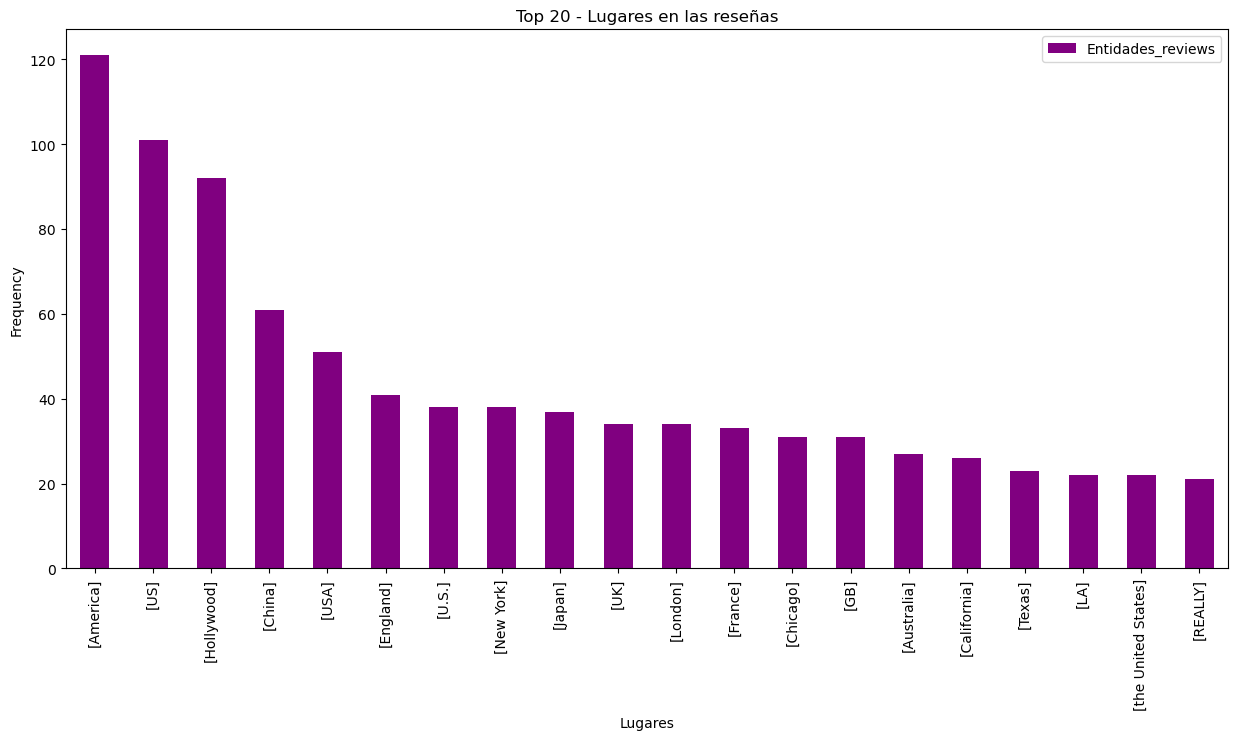

In [ ]:
#Graficamos:
frec_gpe_df.head(20).plot(x="index", y="Entidades_reviews", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Top 20 - Lugares en las reseñas")
plt.xlabel("Lugares")
plt.ylabel("Frequency")
plt.show()

Vemos que 'America' es el lugar que más frecuente aparece en las reseñas, seguido por US, Hollywood, etc.

Veamos qué sucede en estos lugares con respecto al analisis de sentimiento:

#### America:

In [ ]:
#Visualizaremos las reseñas con America
def contiene_america(entidades):
    for entidad, etiqueta in entidades:
        if etiqueta == 'GPE' and entidad == 'America':
            return True
    return False
mascara = df['Entidades_reviews'].apply(contiene_america)

# Filtrar las filas que contienen 'America'
filas_filtradas4= df[mascara]

In [ ]:
filas_filtradas4[['Polarity','sentimiento_reviews','Entidades_reviews']]

,Polarity,sentimiento_reviews,Entidades_reviews
540,1,Positiva,"[(America, GPE), (the American Republic, GPE),..."
653,0,Negativa,"[(two, CARDINAL), (America, GPE), (over 30 min..."
1180,0,Neutra,"[(black & white, ORG), (Chuck Norris, PERSON),..."
1601,1,Neutra,"[(Wondermints, ORG), (Amazon, ORG), (America, ..."
2012,0,Neutra,"[(18 years, DATE), (20, MONEY), (America, GPE)..."
...,...,...,...
48450,0,Neutra,"[(Gerry Beckley, PERSON), (America, GPE), (Dan..."
48712,1,Positiva,"[(America, GPE)]"
48872,0,Neutra,"[(Great, WORK_OF_ART), (Accurate, WORK_OF_ART)..."
49361,0,Neutra,"[(Jayna Davis, PERSON), (five, CARDINAL), (Ame..."


In [ ]:
filas_filtradas4.sentimiento_reviews.value_counts()

Neutra      161
Positiva     40
Negativa      2
Name: sentimiento_reviews, dtype: int64

In [ ]:
filas_filtradas4.Polarity.value_counts()

1    117
0     86
Name: Polarity, dtype: int64

En ambos casos tenemos que en comparación de una reseña negativa o positiva hay más positivas. Pero en el analisis de sentimiento la mayoría es neutra.

Tenemos otra etiqueta que también habla de lugares:

### LOC:

In [ ]:
def obtener_entidades_loc(lista_entidades):
    entidades_loc = [entidad[0] for entidad in lista_entidades if entidad[1] == 'LOC']
    return entidades_loc

loc_entidades = df['Entidades_reviews'].apply(obtener_entidades_loc)

In [ ]:
loc_entidades_df=pd.DataFrame(loc_entidades)
loc_entidades_df= loc_entidades_df[loc_entidades_df['Entidades_reviews'].apply(lambda x: len(x) > 0)]
loc_entidades_df=loc_entidades_df.reset_index()
loc_entidades_df

,index,Entidades_reviews
0,7,[NYC]
1,43,[North America]
2,49,[Jupiter]
3,129,[Electronica]
4,158,"[North, South]"
...,...,...
1478,49850,[the Lost Planet]
1479,49875,[Southern California]
1480,49883,[East]
1481,49941,[Premonition DVD'Some]


In [ ]:
frec_loc= loc_entidades_df['Entidades_reviews'].value_counts().sort_values(ascending=False)
frec_loc.head(20)

[Europe]               54
[NYC]                  41
[Earth]                38
[Africa]               23
[Kindle]               21
[earth]                16
[Asia]                 15
[West]                 14
[New England]          13
[Atlantic]             11
[Mars]                 11
[South]                11
[Caribbean]            10
[Best Buy]              8
[North America]         7
[the Middle East]       7
[East]                  6
[Battery]               6
[the Grand Canyon]      5
[Victorian England]     5
Name: Entidades_reviews, dtype: int64

In [ ]:
frec_loc_df=pd.DataFrame(frec_loc)
frec_loc_df = frec_loc_df.reset_index()
frec_loc_df

,index,Entidades_reviews
0,[Europe],54
1,[NYC],41
2,[Earth],38
3,[Africa],23
4,[Kindle],21
...,...,...
981,[Middle Ages/Ren],1
982,[Rare Earth],1
983,"[Northern Spain, Northern Spain]",1
984,"[the west coast, the east coast]",1


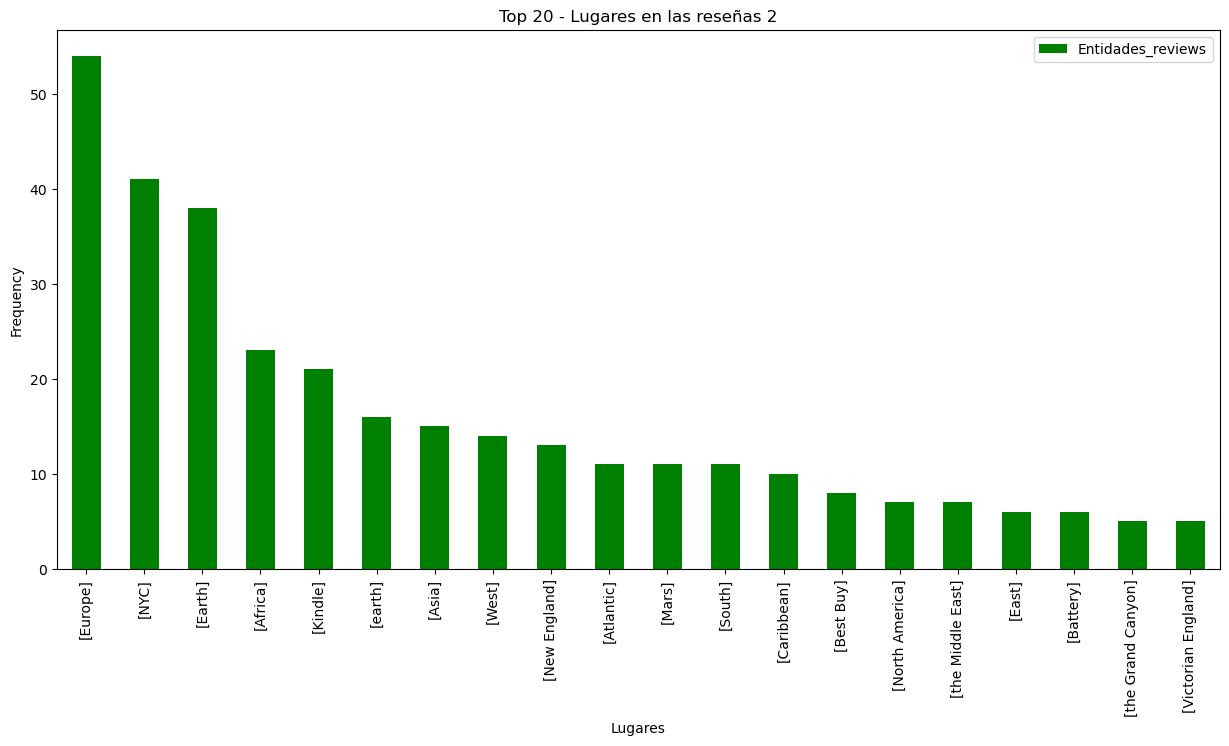

In [ ]:
#Graficamos:
frec_loc_df.head(20).plot(x="index", y="Entidades_reviews", kind='bar',  figsize=(15,7), color = 'green')
plt.title("Top 20 - Lugares en las reseñas 2")
plt.xlabel("Lugares")
plt.ylabel("Frequency")
plt.show()

En este caso, aparece más Europa en las reseñas pero en menor medida que America (según GPE). Veamos el análisis de sentimiento en estos casos.

#### Europa:


In [ ]:
#Visualizaremos las reseñas con Europa
def contiene_europa(entidades):
    for entidad, etiqueta in entidades:
        if etiqueta == 'LOC' and entidad == 'Europe':
            return True
    return False
mascara = df['Entidades_reviews'].apply(contiene_europa)

# Filtrar las filas que contienen 'America'
filas_filtradas5= df[mascara]

In [ ]:
filas_filtradas5[['Polarity','sentimiento_reviews','Entidades_reviews']]

,Polarity,sentimiento_reviews,Entidades_reviews
863,1,Neutra,"[(Radomir Luza, PERSON), (Christina Vella, PER..."
2812,0,Neutra,"[(Harry Truman, PERSON), (NATO, ORG), (the Mar..."
3048,0,Positiva,"[(the Sonic Stage, ORG), (2004, DATE), (iPod, ..."
3540,1,Neutra,"[(the South Pacific, LOC), (America, GPE), (Ph..."
4415,1,Positiva,"[(one, CARDINAL), (Walmart, ORG), (Europe, LOC..."
...,...,...,...
46239,1,Neutra,"[(Europe, LOC)]"
46297,0,Positiva,"[(the Mapsend Streets Gold, ORG), (Mapsend Str..."
47250,1,Neutra,"[(African, NORP), (African, NORP), (African, N..."
49133,1,Neutra,"[(german, NORP), (last year, DATE), (german, N..."


In [ ]:
filas_filtradas5.sentimiento_reviews.value_counts()

Neutra      53
Positiva    17
Negativa     1
Name: sentimiento_reviews, dtype: int64

In [ ]:
filas_filtradas5.Polarity.value_counts()

1    43
0    28
Name: Polarity, dtype: int64

En ambos casos tenemos que en comparación de una reseña negativa o positiva hay más positivas. Pero en el analisis de sentimiento la mayoría es neutra.

Buscando información, la diferencia principal entre **GPE** y **LOC** es la naturaleza politica o administrativa que tiene cada uno. Ambos hacen referencia a lugares, en general pero GPE son lugares con naturaleza politica o administrativa mientras que LOC no.  LOC es más para ubicaciones generales.


## MODELOS

En esta última parte del trabajo aplicaremos modelos de clasificación binaria para poder predecir si una reseña será negativa o positiva a partir del dataset proporcionado.

Modelos que pondremos en práctica:

1. Regresión Logistica
2. Support Vector Machine (SVM)
3. Random Forest
4. XGBoost

Pero antes de comenzar, definamos nuestro Target (y) y Features (X):

In [ ]:
X=df.Reviews.copy()
y=df.Polarity.copy()

Aplicamos Train Test Split:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Aplicamos ahora **TF-IDF** ya que ayuda a representar el texto de manera más efectiva al asignar pesos a las palabras en función de su importancia relativa en las reseñas.  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


### 1. Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8619138086191381
Confusion Matrix:
 [[4263  678]
 [ 703 4357]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4941
           1       0.87      0.86      0.86      5060

    accuracy                           0.86     10001
   macro avg       0.86      0.86      0.86     10001
weighted avg       0.86      0.86      0.86     10001



In [ ]:
#CURVA DE ROC
from sklearn.metrics import roc_curve, auc
# Predicciones del modelo (probabilidades)
y_pred =  model.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

AUC: 0.9350440334284478


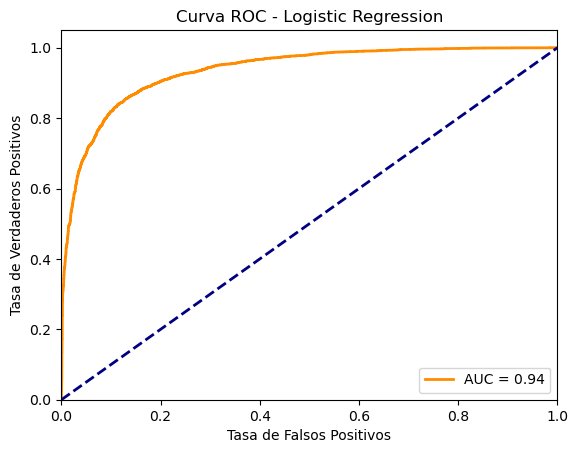

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

**Conclusiones del modelo Logistic Regressor:**
 - *Accuracy=0.86*: nos dice que el 86% fueron bien clasificadas sobre el total. (Buen número).
 - *Matriz de confusion*:
     - 4357 veces el modelo predijo correctamente que las reseñas fueron positivas.
     - 4263 veces el modelo predijo correctamente que las reseñas fueron negativas.
     - 678 veces el modelo predijo incorrectamente que las reseñas fueron positivas porque eran negativas.
     - 703 veces el modelo predijo incorrectamente que las reseñas fueron negativas porque eran positivas.
 - *Classification Report*: en general se mantiene también en el 86%.
 - *AUC-ROC = 0.94*: es un valor alto que indica que el modelo tiene un buen rendimiento, es decir, que separa y clasifica bien entre las dos clases.

### 2. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8611138886111389
Confusion Matrix:
 [[4270  671]
 [ 718 4342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4941
           1       0.87      0.86      0.86      5060

    accuracy                           0.86     10001
   macro avg       0.86      0.86      0.86     10001
weighted avg       0.86      0.86      0.86     10001



In [ ]:
#CURVA DE ROC
from sklearn.metrics import roc_curve, auc
# Predicciones del modelo (probabilidades)
y_scores =svm_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

AUC: 0.9356412785493327


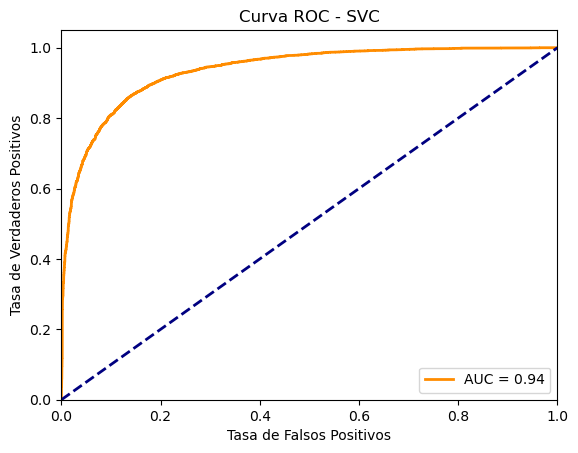

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVC')
plt.legend(loc='lower right')
plt.show()

**Conclusiones del modelo SVC:**
 - *Accuracy=0.86*: nos dice que el 86% fueron bien clasificadas sobre el total. (Igual que en Logistic).
 - *Matriz de confusion*:
     - 4342 veces el modelo predijo correctamente que las reseñas fueron positivas (Menos que en Logistic).
     - 4270 veces el modelo predijo correctamente que las reseñas fueron negativas (Más que en Logistic).
     - 671 veces el modelo predijo incorrectamente que las reseñas fueron positivas porque eran negativas (Menos que en Logistic).
     - 718 veces el modelo predijo incorrectamente que las reseñas fueron negativas porque eran positivas (Más que en Logistic).
 - *Classification Report*: en general se mantiene también en el 86%. (Similar a Logistic)
 - *AUC-ROC = 0.94*: es un valor alto que indica que el modelo tiene un buen rendimiento, es decir, que separa y clasifica bien entre las dos clases. (Similar a Logistic)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7855214478552145
Confusion Matrix:
 [[3784 1157]
 [ 988 4072]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      4941
           1       0.78      0.80      0.79      5060

    accuracy                           0.79     10001
   macro avg       0.79      0.79      0.79     10001
weighted avg       0.79      0.79      0.79     10001



In [ ]:
# Curva ROC
y_scores = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

AUC: 0.8700989862192047


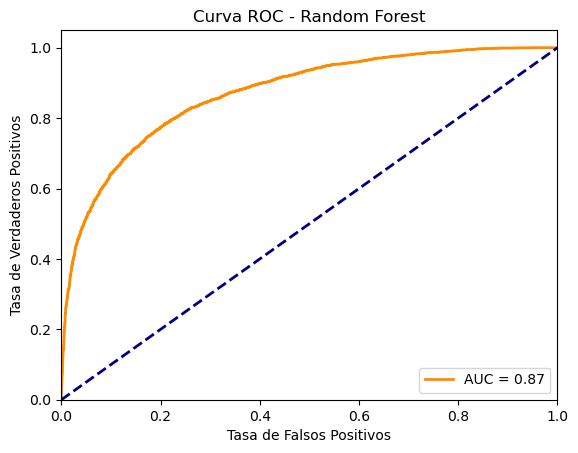

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

**Conclusiones del modelo SVC:**
 - *Accuracy=0.79*: nos dice que el 79% fueron bien clasificadas sobre el total. (Menor a Logistic y SVC).
 - *Matriz de confusion*:
     - 4072 veces el modelo predijo correctamente que las reseñas fueron positivas (Menor a Logistic y SVC).
     - 3784 veces el modelo predijo correctamente que las reseñas fueron negativas (Menor a Logistic y SVC).
     - 1157 veces el modelo predijo incorrectamente que las reseñas fueron positivas porque eran negativas (Mayor a Logistic y SVC).
     - 988 veces el modelo predijo incorrectamente que las reseñas fueron negativas porque eran positivas (Mayor a Logistic y SVC).
 - *Classification Report*: en general se mantiene también en el 79%. (Menor a Logistic y SVC)
 - *AUC-ROC = 0.86*: es un valor medianamente alto que indica que el modelo tiene un buen rendimiento, es decir, que separa y clasifica bien, en general, entre las dos clases. (Menor a Logistic y SVC)
 Cambiemos los hiperparámetros de Ramdon Forest (n_estimators=200, max_depth=20):

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1)

# Entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8102189781021898
Confusion Matrix:
 [[3947  994]
 [ 904 4156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      4941
           1       0.81      0.82      0.81      5060

    accuracy                           0.81     10001
   macro avg       0.81      0.81      0.81     10001
weighted avg       0.81      0.81      0.81     10001



In [ ]:
# Curva ROC
y_scores = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

AUC: 0.896245199280362


Vemos que mejora en relación a los hiperparámetros n_estimators=100, max_depth=10 pero igualmente siguen siendo valores por debajo de Linear Regression y SVC.

### 4. XGBoost

In [ ]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=0
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7704229577042295
Confusion Matrix:
 [[3652 1289]
 [1007 4053]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      4941
           1       0.76      0.80      0.78      5060

    accuracy                           0.77     10001
   macro avg       0.77      0.77      0.77     10001
weighted avg       0.77      0.77      0.77     10001



In [ ]:
# Curva ROC
y_scores = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

AUC: 0.8600691319626934


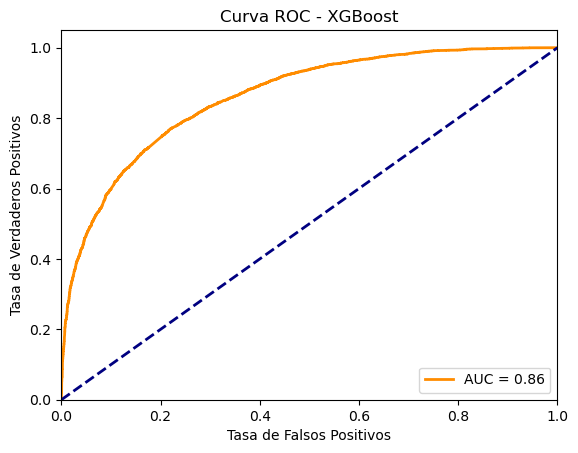

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

**Conclusiones del modelo SVC:**
 - *Accuracy=0.77*: nos dice que el 77% fueron bien clasificadas sobre el total. (Menor a Logistic y SVC).
 - *Matriz de confusion*:
     - 4053 veces el modelo predijo correctamente que las reseñas fueron positivas (Menor a Logistic y SVC).
     - 3652 veces el modelo predijo correctamente que las reseñas fueron negativas (Menor a Logistic y SVC).
     - 1289 veces el modelo predijo incorrectamente que las reseñas fueron positivas porque eran negativas (Mayor a Logistic y SVC).
     - 1007 veces el modelo predijo incorrectamente que las reseñas fueron negativas porque eran positivas (Mayor a Logistic y SVC).
 - *Classification Report*: en general se mantiene también en el 77%. (Menor a Logistic y SVC)
 - *AUC-ROC = 0.86*: es un valor medianamente alto que indica que el modelo tiene un buen rendimiento, es decir, que separa y clasifica bien, en general, entre las dos clases. (Menor a Logistic y SVC)


### Conclusión:

Con respecto a la utilización de modelos, vemos que Linear Regression o SVC son buenos para predecir si una reseña es positiva o negativa. Ambos tienen un rendimiento similar y de muy buena clasificación.